In [71]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings                                         
warnings.filterwarnings('ignore') 

In [3]:
df_continuous = pd.read_csv('Data/df_continuous.csv')
df_discrete = pd.read_csv('Data/df_discrete.csv')
df_categorical = pd.read_csv('Data/df_categorical.csv')

#Concatenating the Continuous and Discrete dataframes to create a Numerical Dataframe
df_numerical = pd.concat([df_continuous, df_discrete], axis =1 )

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [4]:
df_continuous.head()

,Income,Total Claim Amount,Customer Lifetime Value
0,56274,384.811147,2763.519279
1,0,1131.464935,6979.535903
2,48767,566.472247,12887.431650
3,0,529.881344,7645.861827
4,43836,138.130879,2813.692575


In [5]:
df_discrete.head()

,Months Since Policy Inception,Months Since Last Claim,Number of Policies,Monthly Premium Auto,Number of Open Complaints
0,5,32,1,69,0
1,42,13,8,94,0
2,38,18,2,108,0
3,65,18,7,106,0
4,44,12,1,73,0


In [6]:
df_numerical.head()

,Income,Total Claim Amount,Customer Lifetime Value,Months Since Policy Inception,Months Since Last Claim,Number of Policies,Monthly Premium Auto,Number of Open Complaints
0,56274,384.811147,2763.519279,5,32,1,69,0
1,0,1131.464935,6979.535903,42,13,8,94,0
2,48767,566.472247,12887.431650,38,18,2,108,0
3,0,529.881344,7645.861827,65,18,7,106,0
4,43836,138.130879,2813.692575,44,12,1,73,0


In [7]:
df_categorical.head()

,Education,Policy Type,Sales Channel,State,Vehicle Class,Response,EmploymentStatus,Marital Status,Coverage,Policy,Vehicle Size,Renew Offer Type,Location Code,Gender,Effective To Date,Expiry_date,Expiry_year,Expiry_month,Expiry_week_in_year,Expiry_day_of_week,Expiry_day_of_month
0,Bachelor,Corporate Auto,Agent,Washington,Two-Door Car,No,Employed,Married,Basic,Corporate L3,Medsize,Offer1,Suburban,F,2/24/11,2011-02-24,2011,2,8,3,24
1,Bachelor,Personal Auto,Agent,Arizona,Four-Door Car,No,Unemployed,Single,Extended,Personal L3,Medsize,Offer3,Suburban,F,1/31/11,2011-01-31,2011,1,5,0,31
2,Bachelor,Personal Auto,Agent,Nevada,Two-Door Car,No,Employed,Married,Premium,Personal L3,Medsize,Offer1,Suburban,F,2/19/11,2011-02-19,2011,2,7,5,19
3,Bachelor,Corporate Auto,Call Center,California,SUV,No,Unemployed,Married,Basic,Corporate L2,Medsize,Offer1,Suburban,M,1/20/11,2011-01-20,2011,1,3,3,20
4,Bachelor,Personal Auto,Agent,Washington,Four-Door Car,No,Employed,Single,Basic,Personal L1,Medsize,Offer1,Rural,M,2/3/11,2011-02-03,2011,2,5,3,3


In [289]:
df_categorical.columns

Index(['Education', 'Policy Type', 'Sales Channel', 'State', 'Vehicle Class',
       'Response', 'EmploymentStatus', 'Marital Status', 'Coverage', 'Policy',
       'Vehicle Size', 'Renew Offer Type', 'Location Code', 'Gender',
       'Effective To Date', 'Expiry_date', 'Expiry_year', 'Expiry_month',
       'Expiry_week_in_year', 'Expiry_day_of_week', 'Expiry_day_of_month'],
      dtype='object')

In [306]:
# Helper Functions for plotting

def cont_hist(Feature, bins):
    
    fig, axes = plt.subplots(ncols=2, figsize=(25, 15), dpi=100)

    sns.distplot(df_numerical[Feature][(df_categorical['Response'] == 'Yes')],
                 kde = False, 
                 label='Yes Response', 
                 ax = axes[0], 
                 bins = bins,
                 color = 'Green')

    sns.distplot(df_numerical[Feature][(df_categorical['Response'] == 'No')],
                 kde = False, 
                 label='No Response',
                 ax = axes[1], 
                 bins = bins,
                 color = 'red')

    axes[0].set_xlabel(Feature, labelpad = 15)
    #axes[0].set_ylabel(Feature, labelpad = 15)
    axes[0].xaxis.label.set_size(20)
    axes[0].yaxis.label.set_size(20)
    axes[0].tick_params(axis='x', labelsize=18)
    axes[0].tick_params(axis='y', labelsize=18)
    axes[0].set_title(f'{Feature} Distribution for Yes response', fontsize=20, pad = 15)

    axes[1].set_xlabel(Feature, labelpad = 15)
    #axes[1].set_ylabel(Feature, labelpad = 15)
    axes[1].xaxis.label.set_size(20)
    axes[1].yaxis.label.set_size(20)
    axes[1].tick_params(axis='x', labelsize=18)
    axes[1].tick_params(axis='y', labelsize=18)
    axes[1].set_title(f'{Feature} Distribution for No response', fontsize=20, pad = 15)

    plt.show()

def bp_plt(Feature):

    fig, axes = plt.subplots(figsize=(25, 15), dpi=100)

    axes.violinplot([df_numerical[Feature].to_list(), 
                  df_numerical[Feature][(df_categorical['Response'] == 'Yes')].to_list(),
                  df_numerical[Feature][(df_categorical['Response'] == 'No')].to_list()],
                   showextrema = False)

    bp = axes.boxplot([df_numerical[Feature].to_list(), 
                  df_numerical[Feature][(df_categorical['Response'] == 'Yes')].to_list(),
                  df_numerical[Feature][(df_categorical['Response'] == 'No')].to_list()],
                  widths = 0.1,)

    for element in ['boxes', 'whiskers', 'fliers', 'means', 'medians', 'caps']:
        plt.setp(bp[element], color='black', linewidth = 5)

    axes.set_xticklabels([Feature,'Yes Response', 'No Response'])
    axes.set_ylabel(Feature, labelpad = 15)
    axes.xaxis.label.set_size(20)
    axes.yaxis.label.set_size(20)


    axes.grid()
    axes.tick_params(axis='x', labelsize=20)
    axes.tick_params(axis='y', labelsize=20)
    axes.set_title(f'{Feature} v/s Yes/No Feature responses - Boxplot', fontsize=20, pad = 15)


    plt.show()

def cat_plt(Feature):
    
    fig, axes = plt.subplots(figsize=(10,7), dpi=100)

    ax = sns.countplot(df_categorical['Response'],hue = df_categorical[Feature])

    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    for p in ax.patches:
        ax.annotate(f"{p.get_height() * 100 / df_categorical.shape[0]:.2f}%", (p.get_x() + p.get_width() / 2., p.get_height()),
             ha='center', va='center', fontsize=11, color='black', rotation=0, xytext=(0, 10),
             textcoords='offset points')

    axes.set_title(f'{Feature} v/s Response Barplot', fontsize=15, pad = 15)
    axes.set_ylabel('Total number of Response', labelpad = 15)
    axes.xaxis.label.set_size(10)
    axes.yaxis.label.set_size(10)
    axes.grid()
    axes.tick_params(axis='x', labelsize=10)
    axes.tick_params(axis='y', labelsize=10)
    
    plt.show()

# Univariate Analysis

Our Target to predict is the 'Response' feature in the Categorical DataFrame.

So, we will be stratifying the 'Response' feature over the other independent variables.

# I. Plotting histograms for Numerical Features

   ## 1.1. Income - Click / No Click Response Histogram Distribution

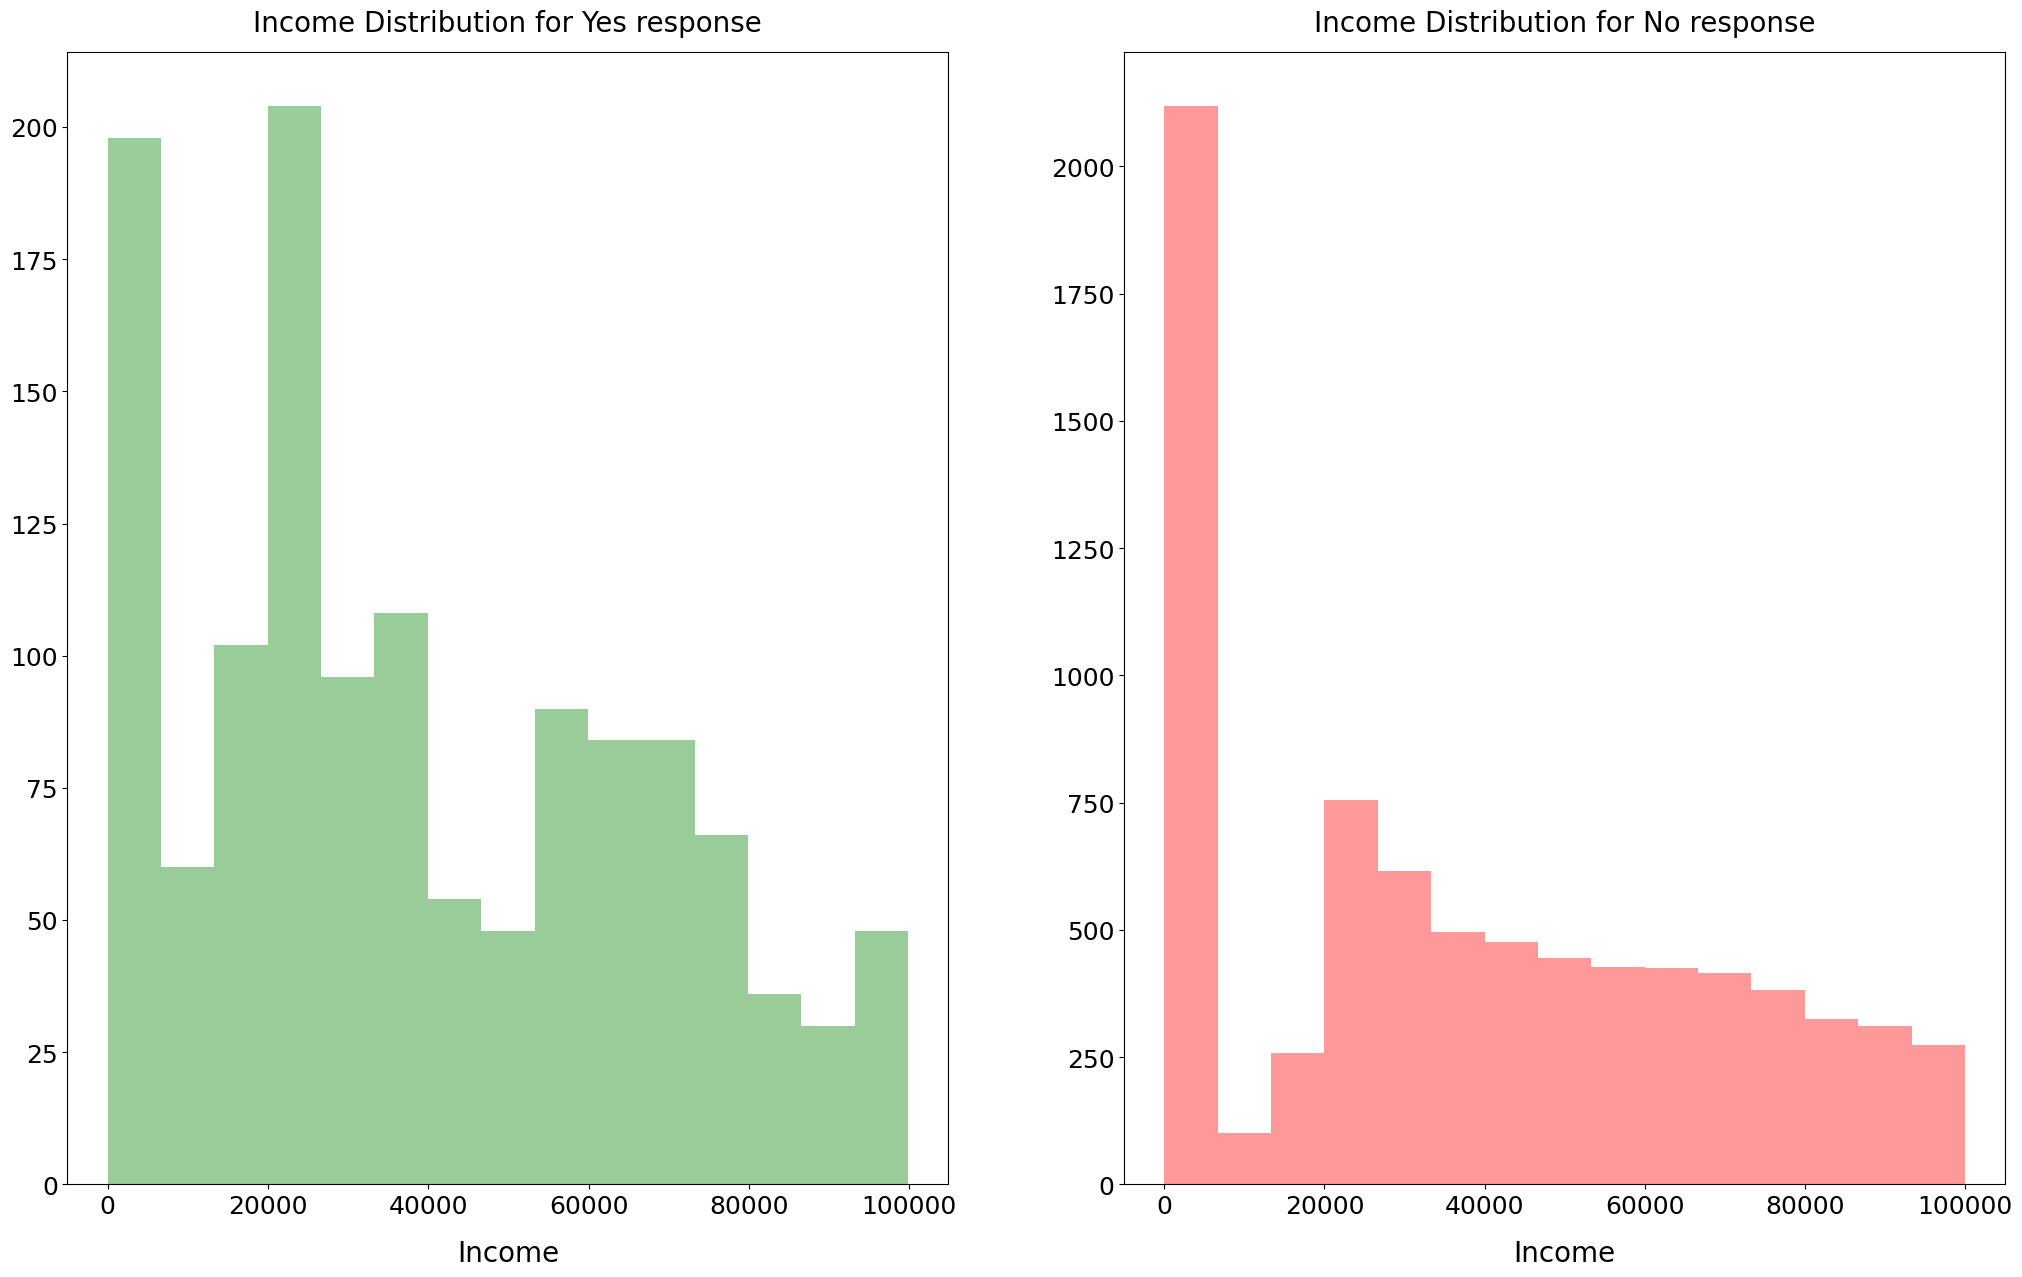

In [104]:
cont_hist('Income', bins = 15)

* Many people have shown income as zero in the dataset and hence we have removed those records.

* The density of the histogram varies significantly as the data is imbalanced with respect to the 'Response' feature.

* The distribution of the income feature is almost the same and the little variance shown can be explained by the dataset not being proportional.

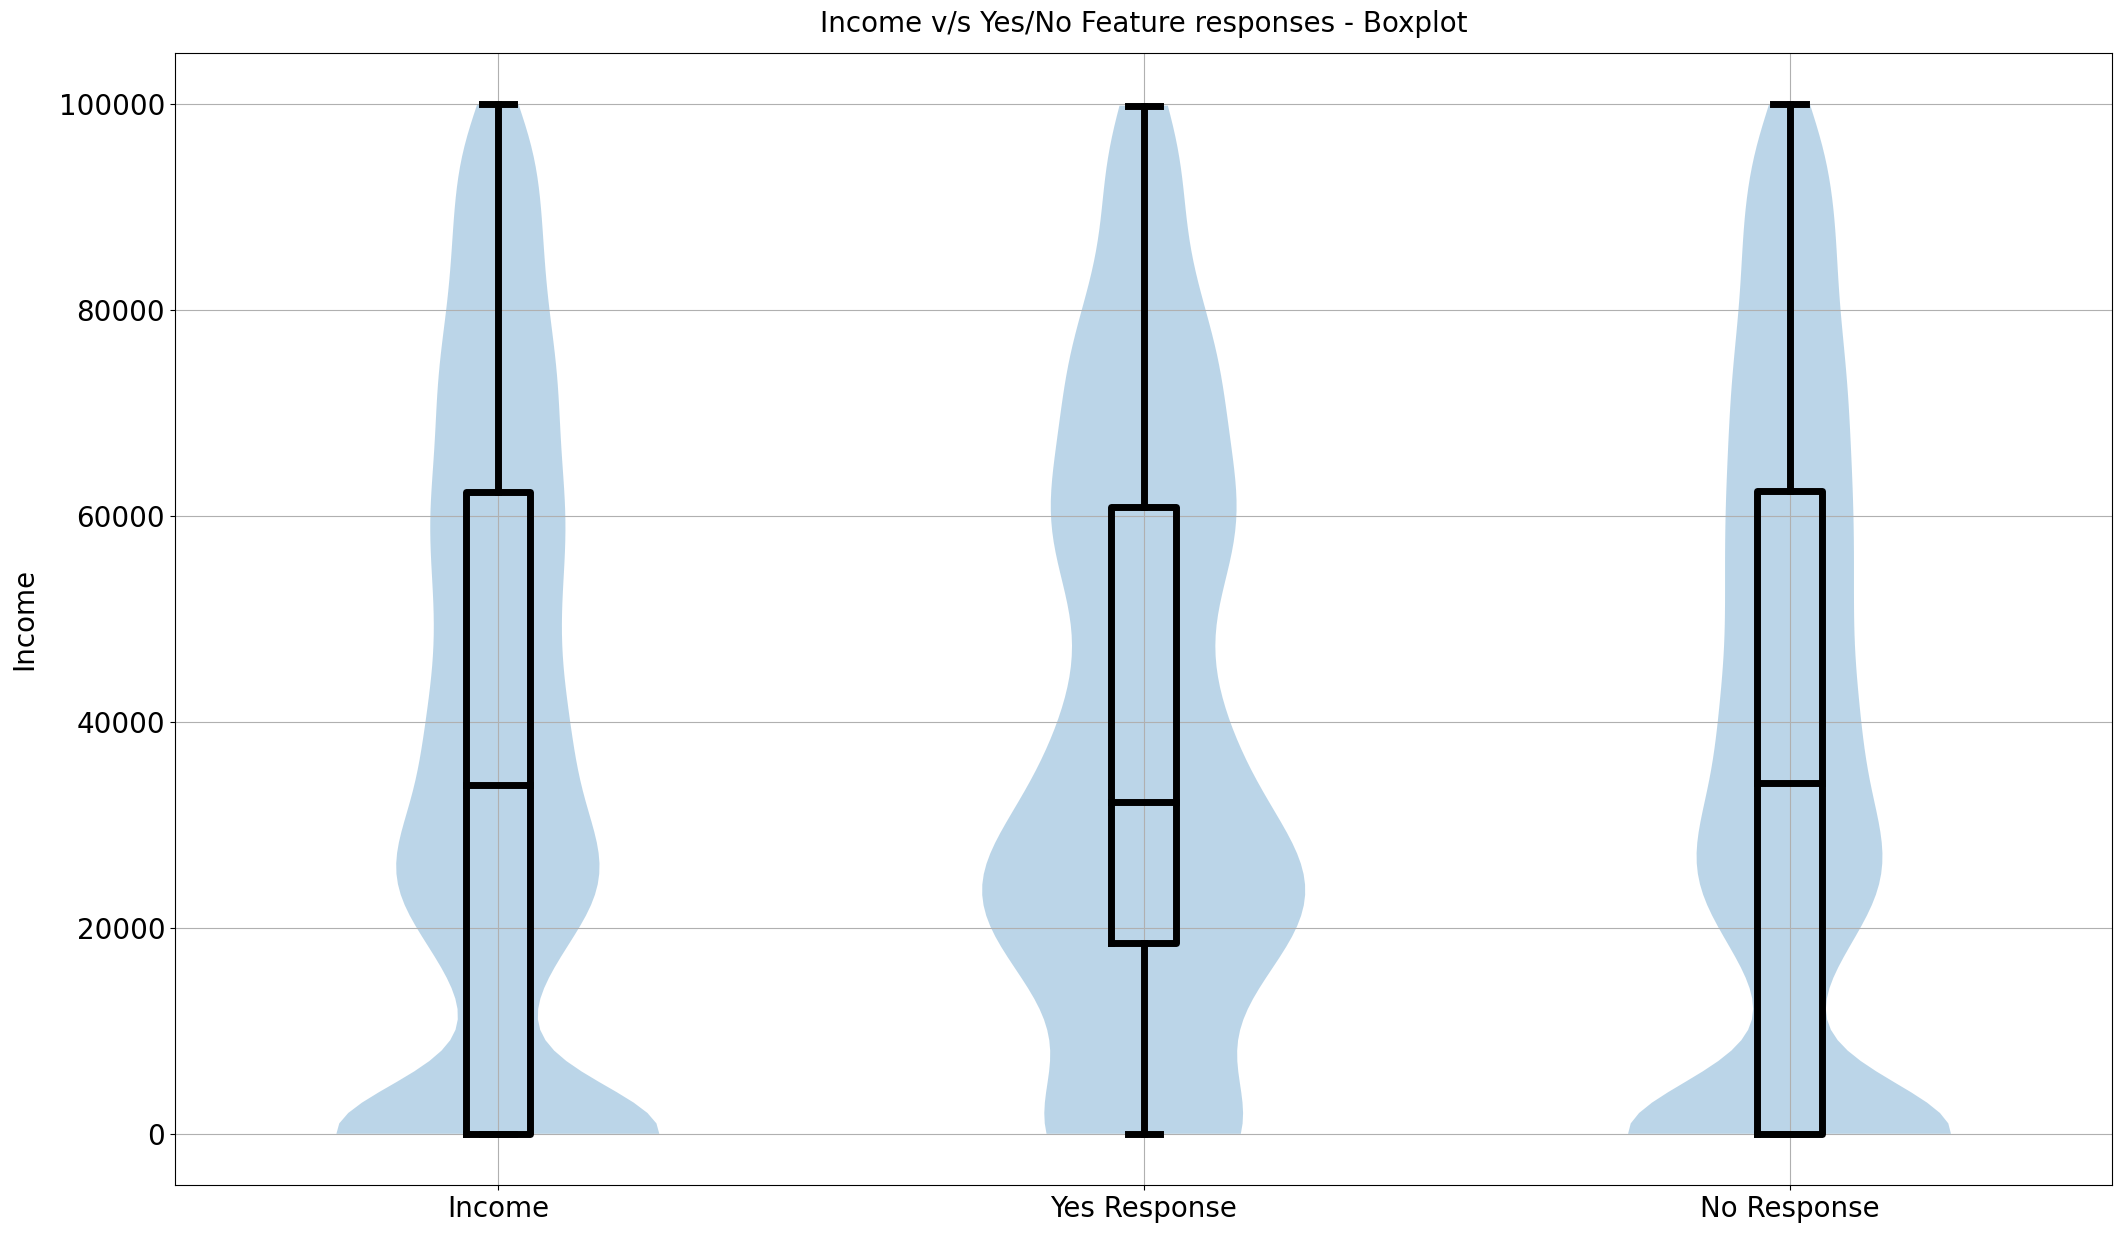

In [288]:
bp_plt('Income')

   ## 2.1. Total Claim Amount - Click / No Click Response Histogram Distribution

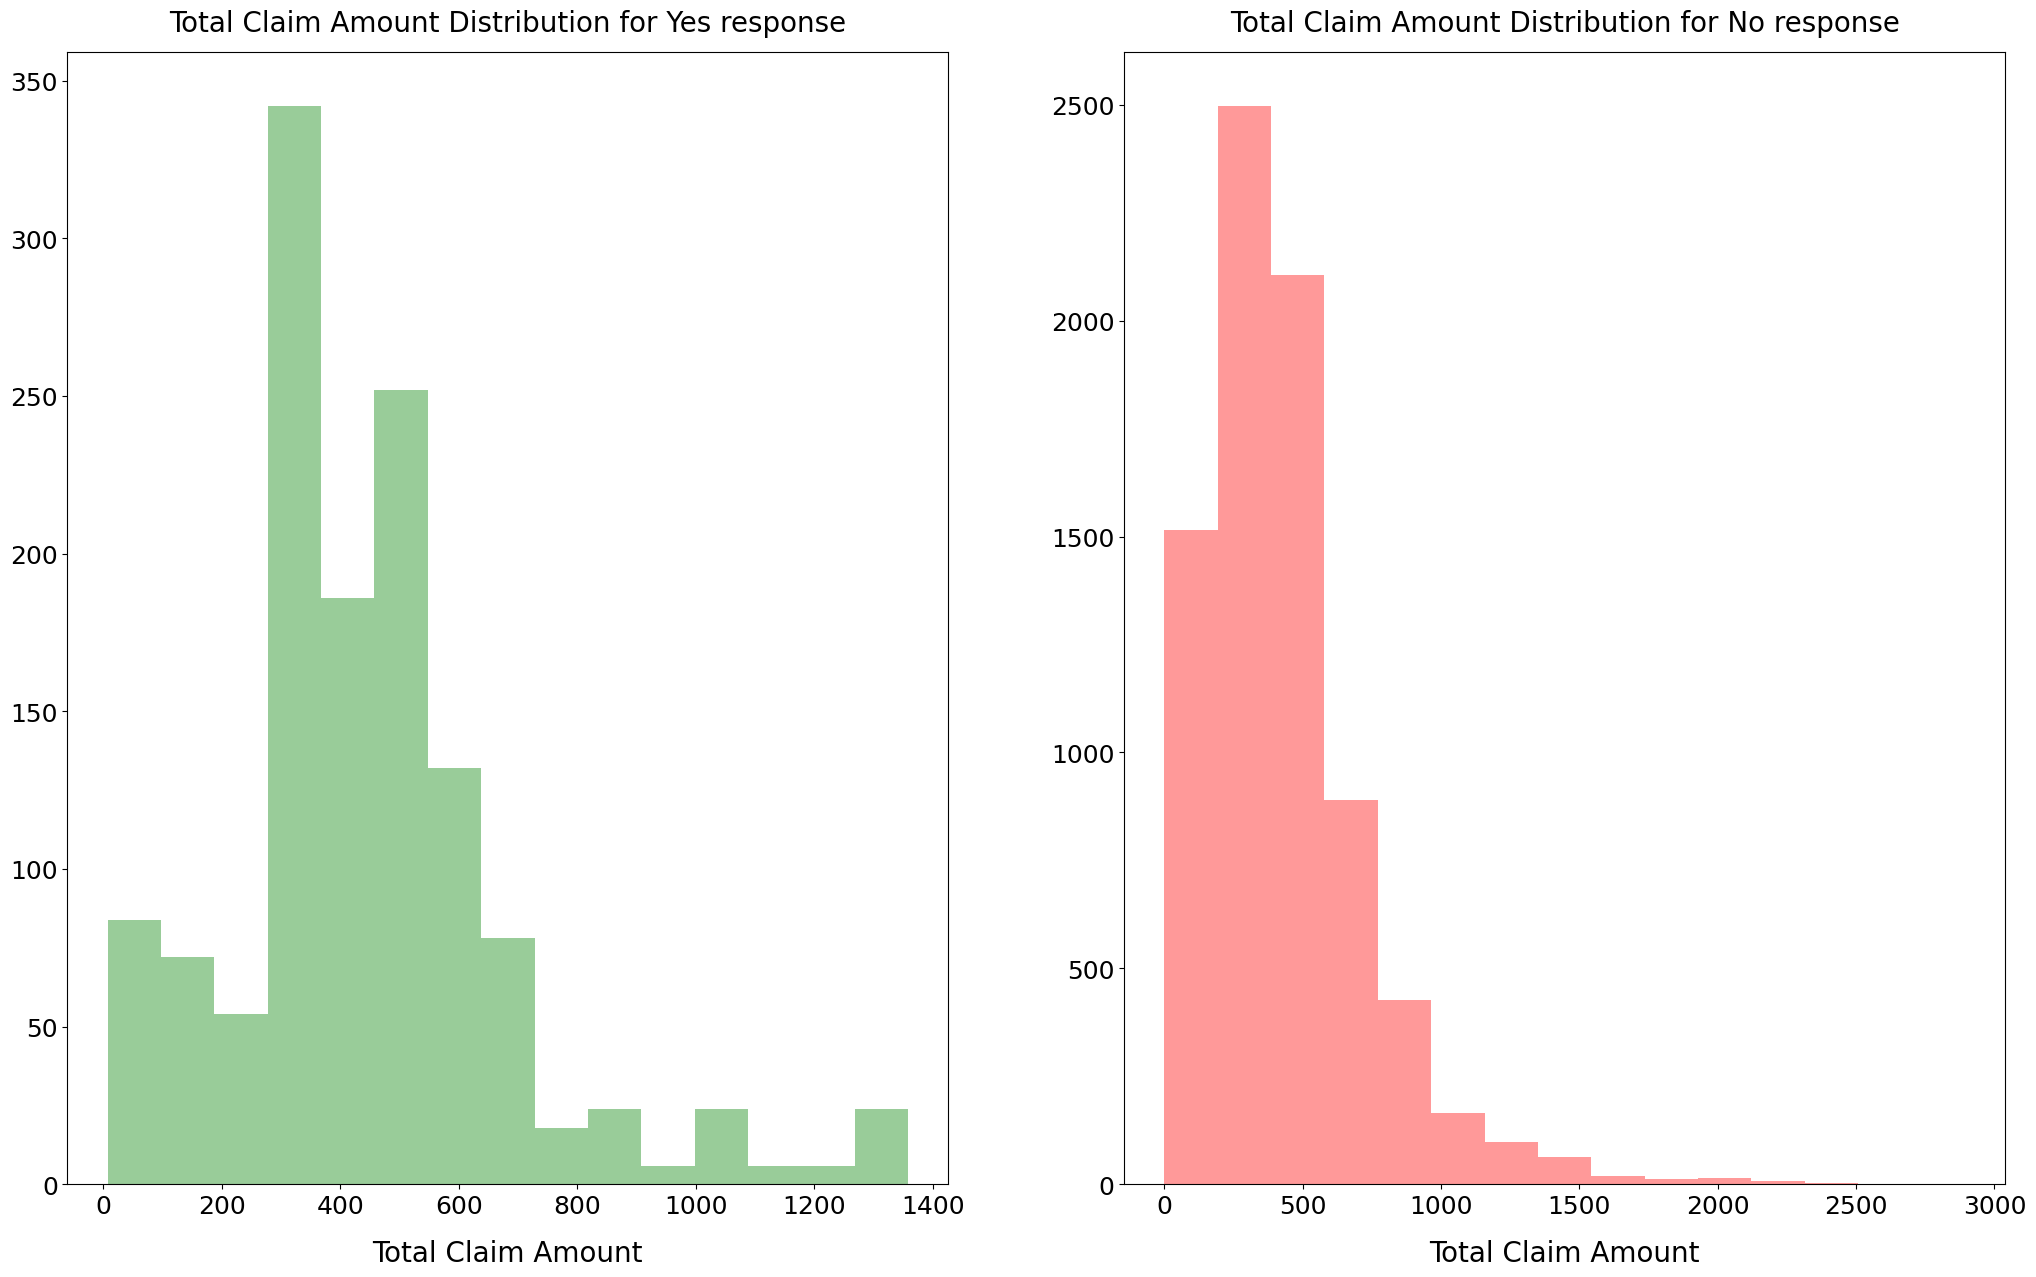

In [105]:
cont_hist('Total Claim Amount', bins = 15)

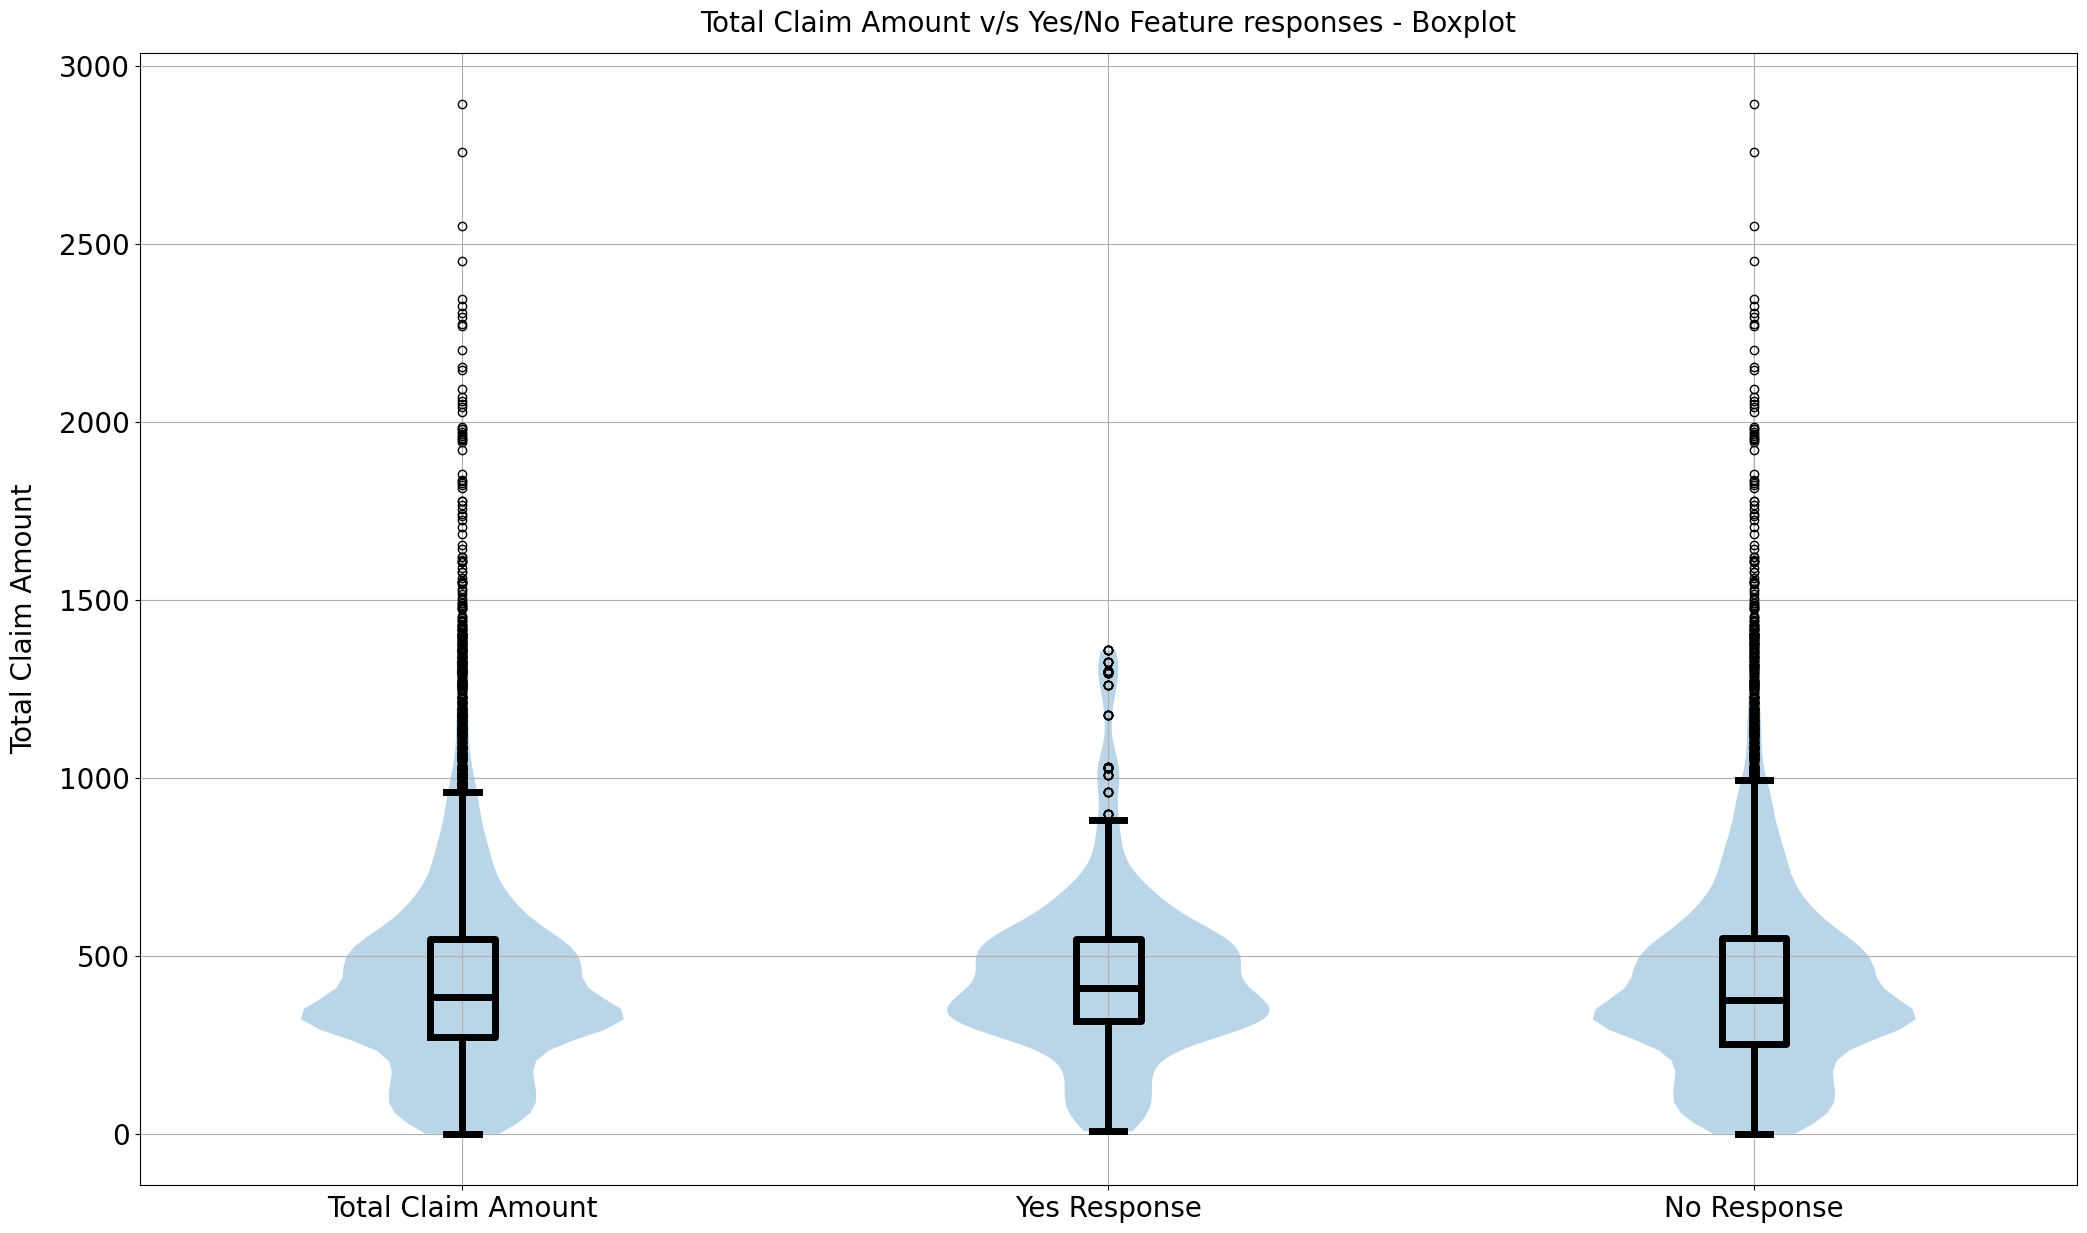

In [287]:
bp_plt('Total Claim Amount')

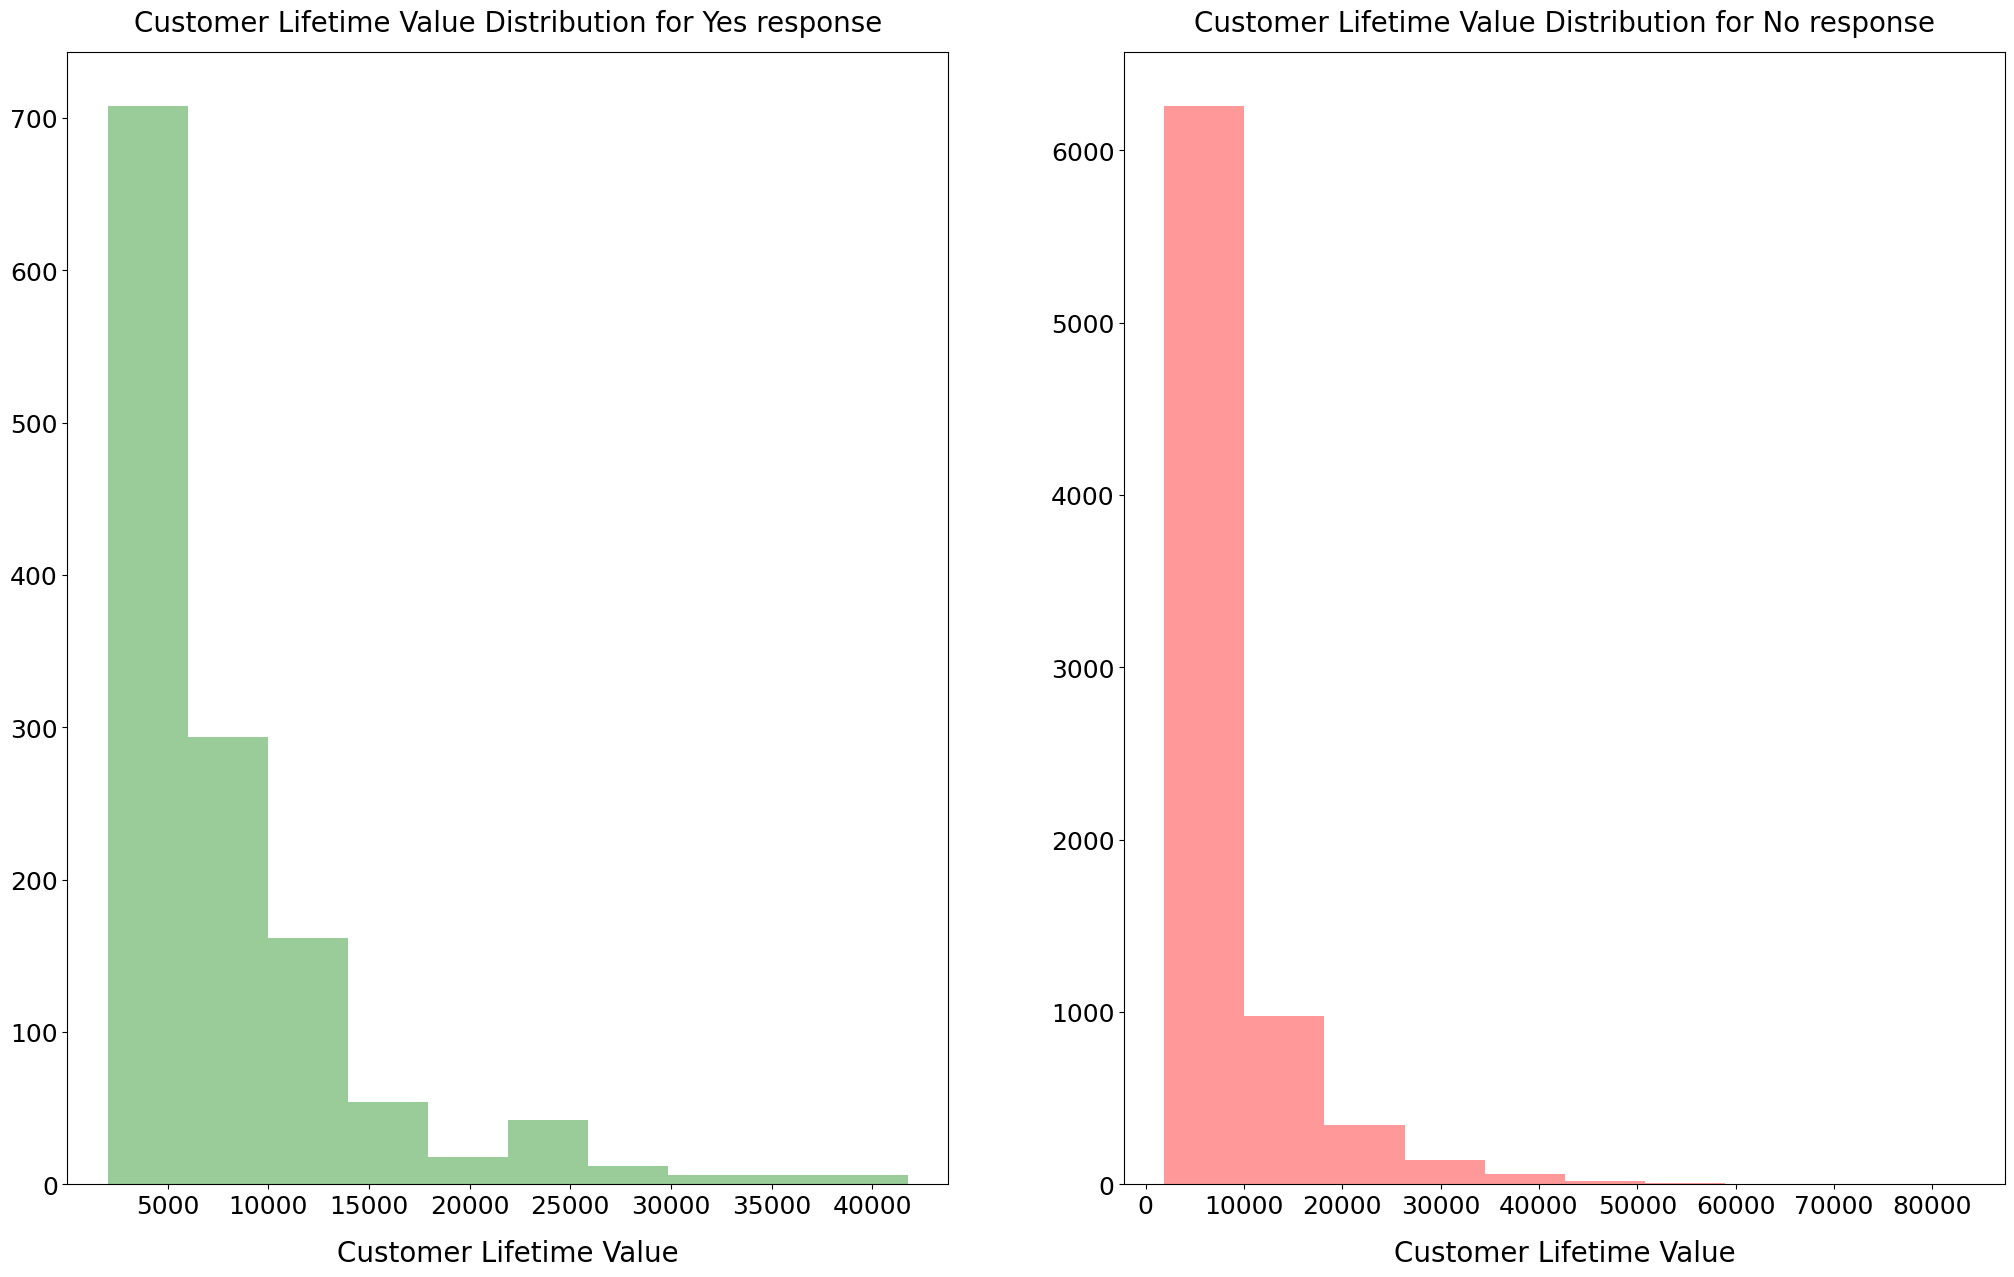

In [106]:
cont_hist('Customer Lifetime Value', bins = 10)

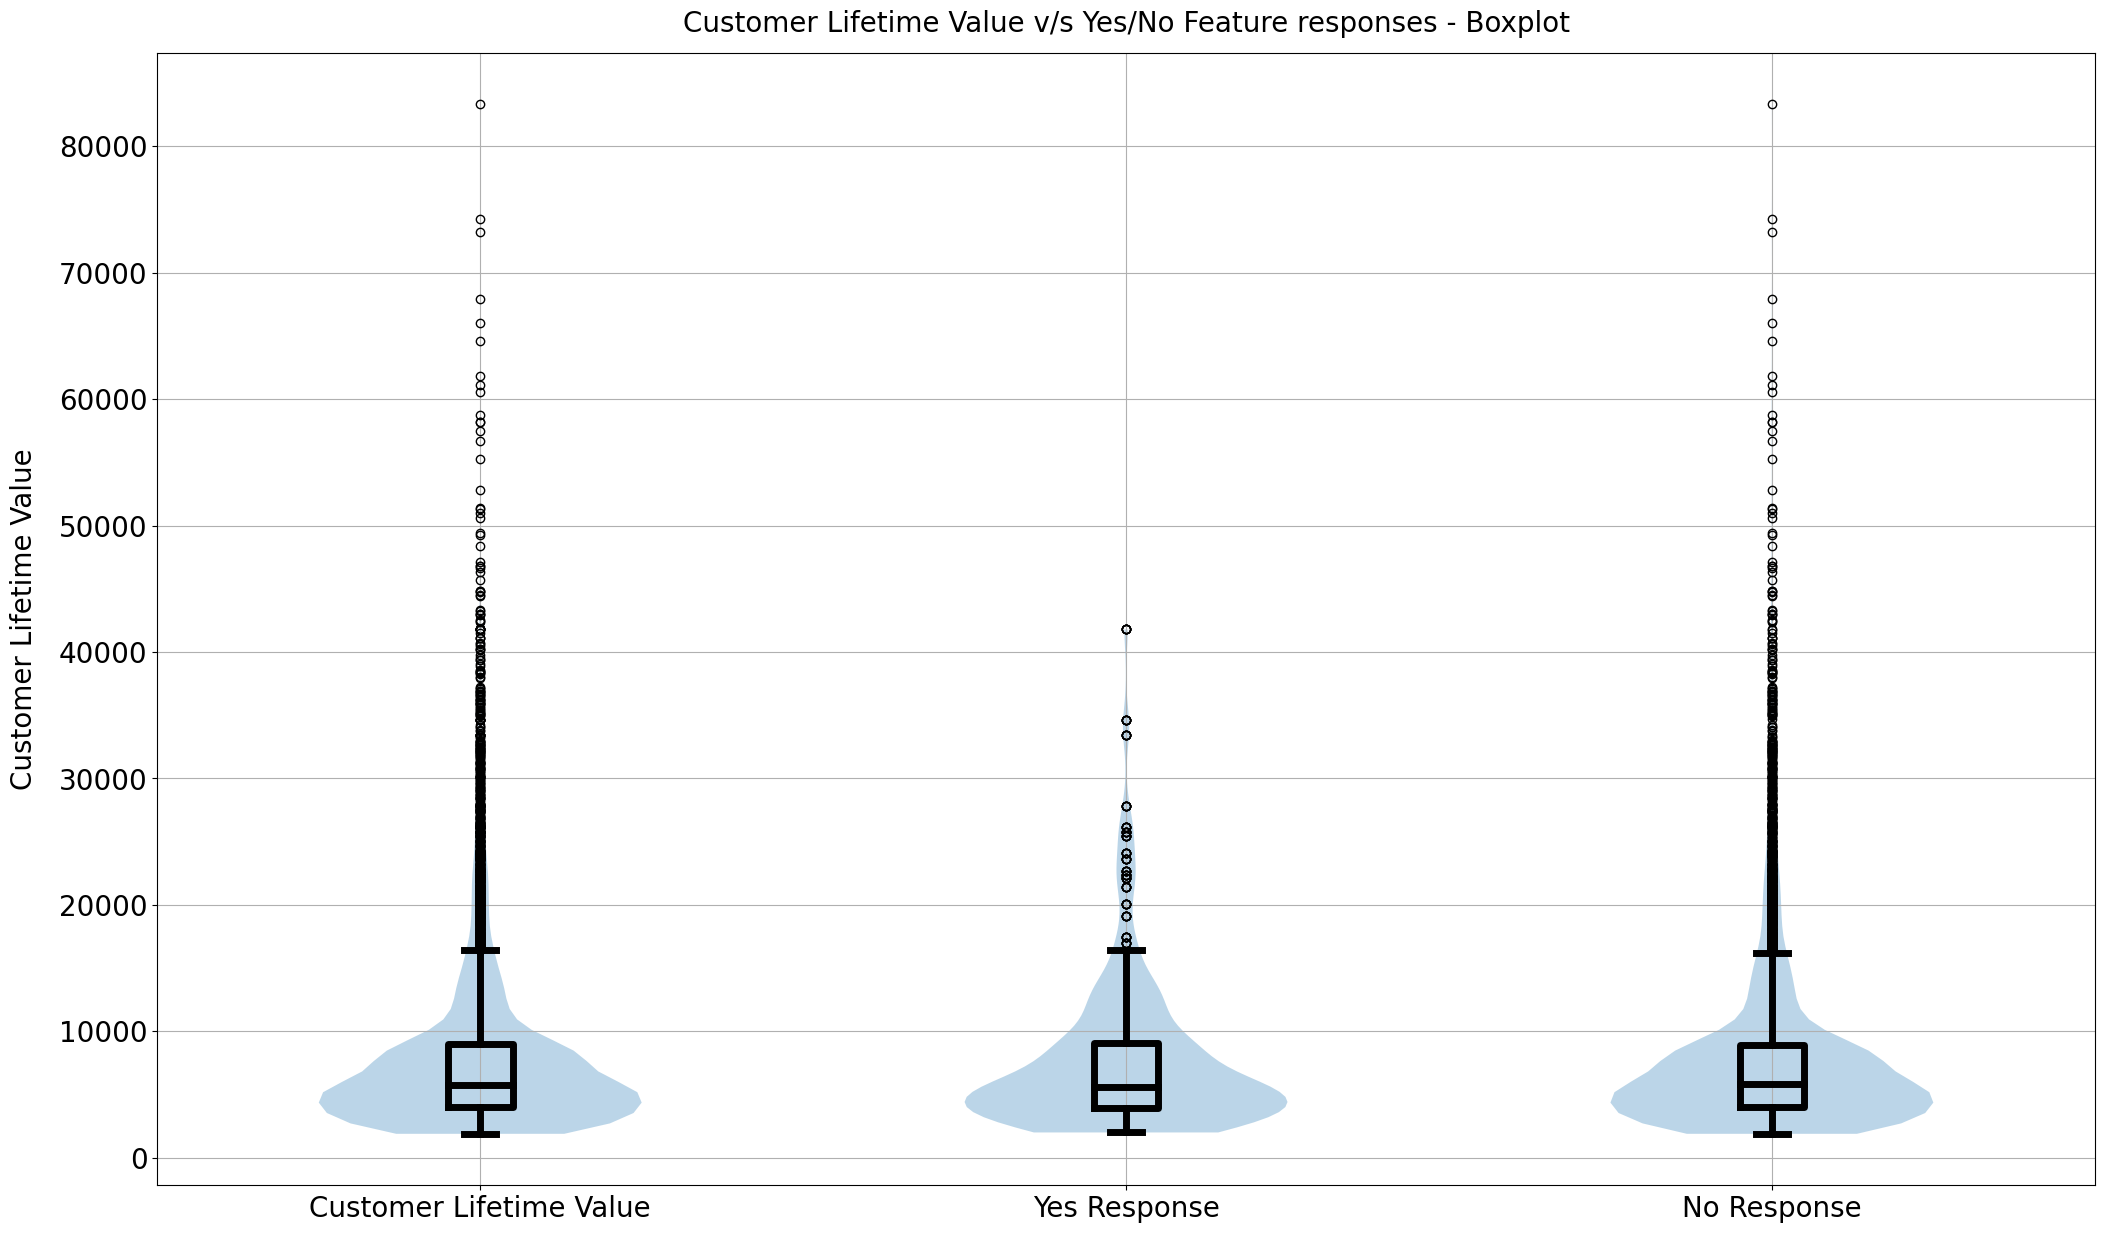

In [286]:
bp_plt('Customer Lifetime Value')

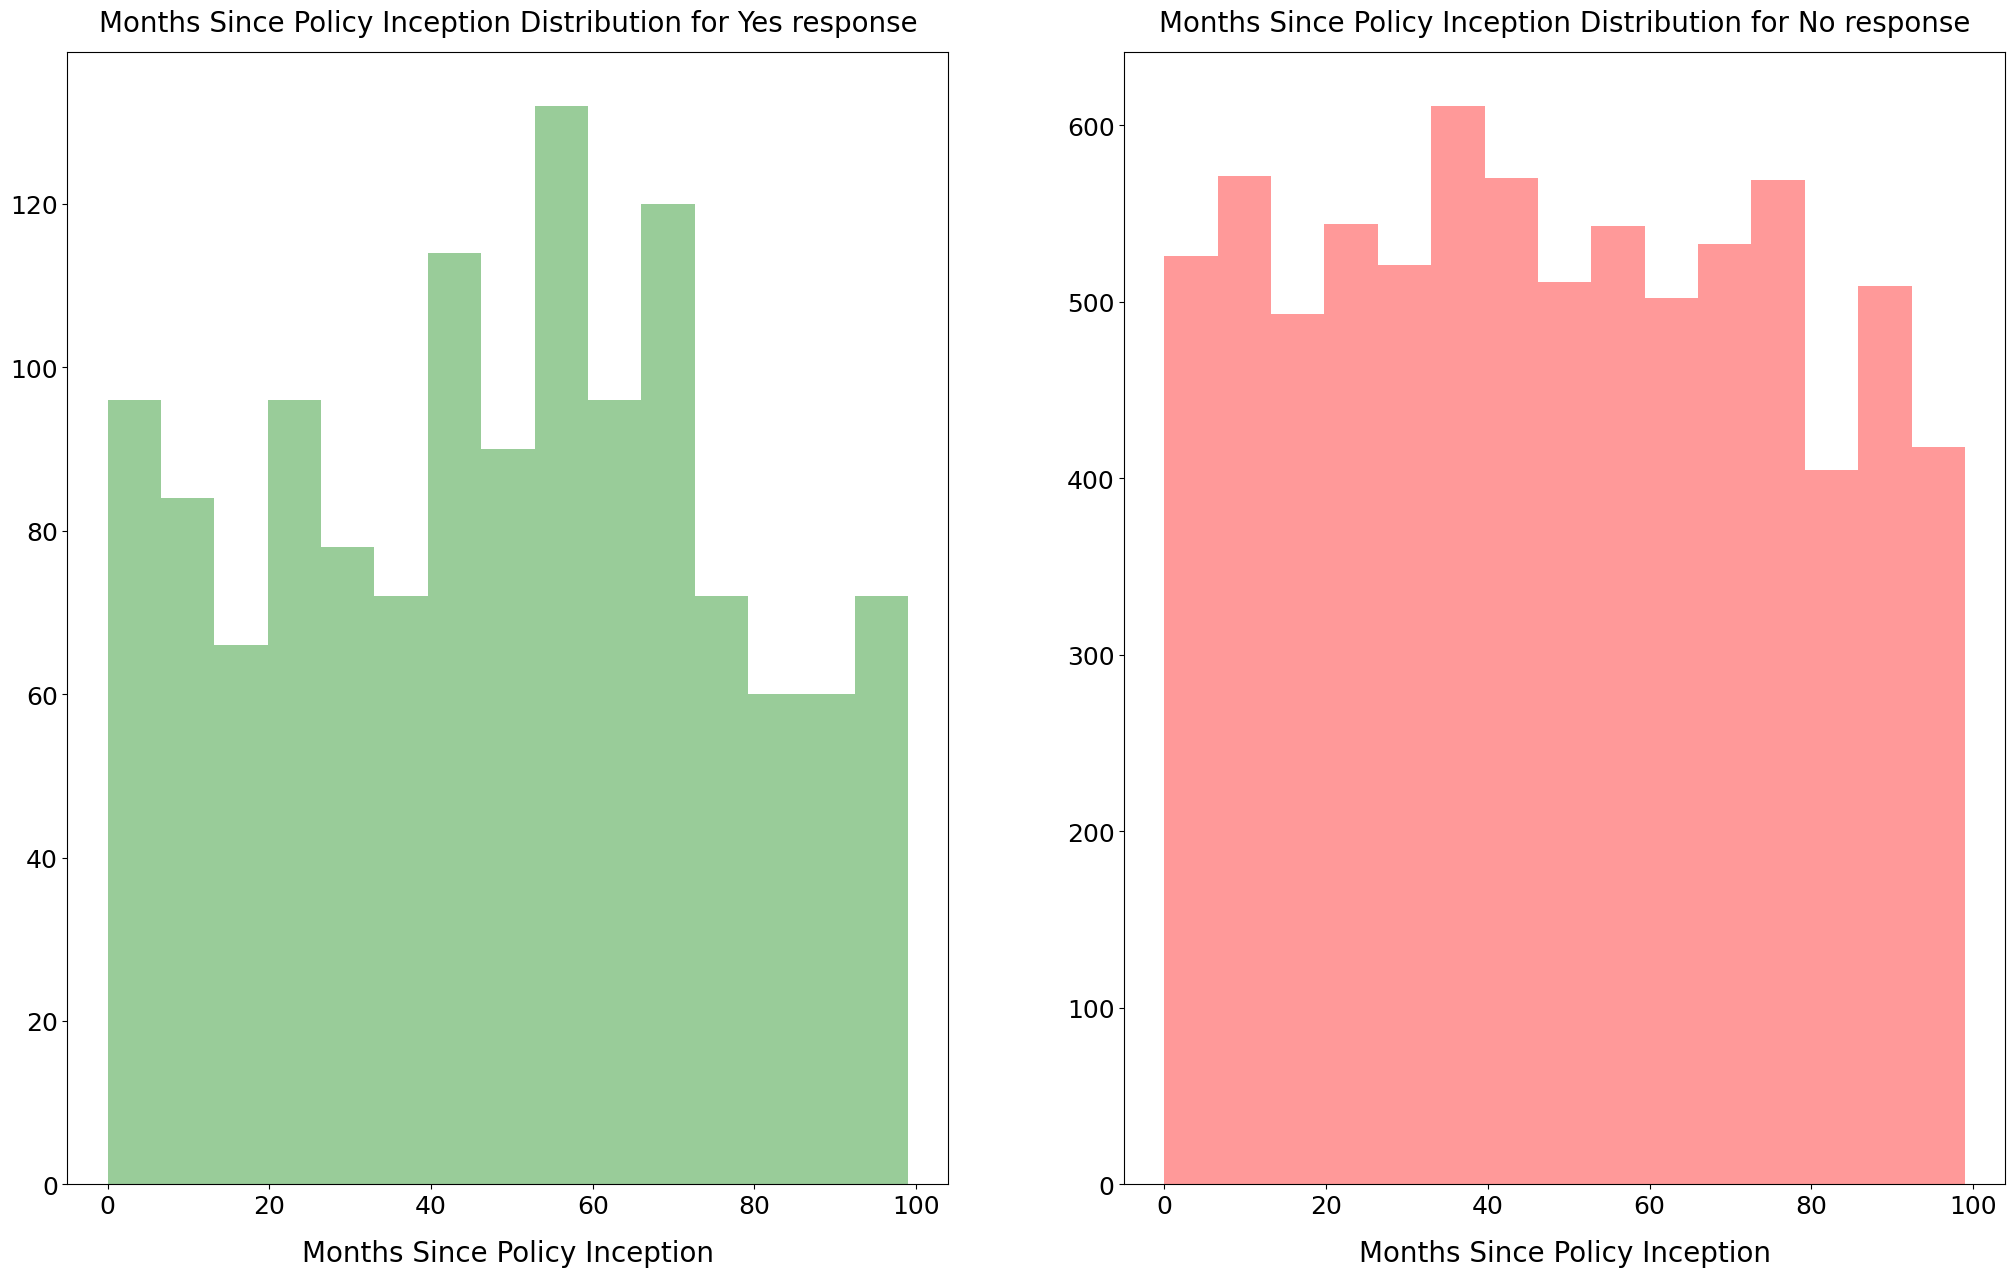

In [112]:
cont_hist('Months Since Policy Inception', bins = 15)

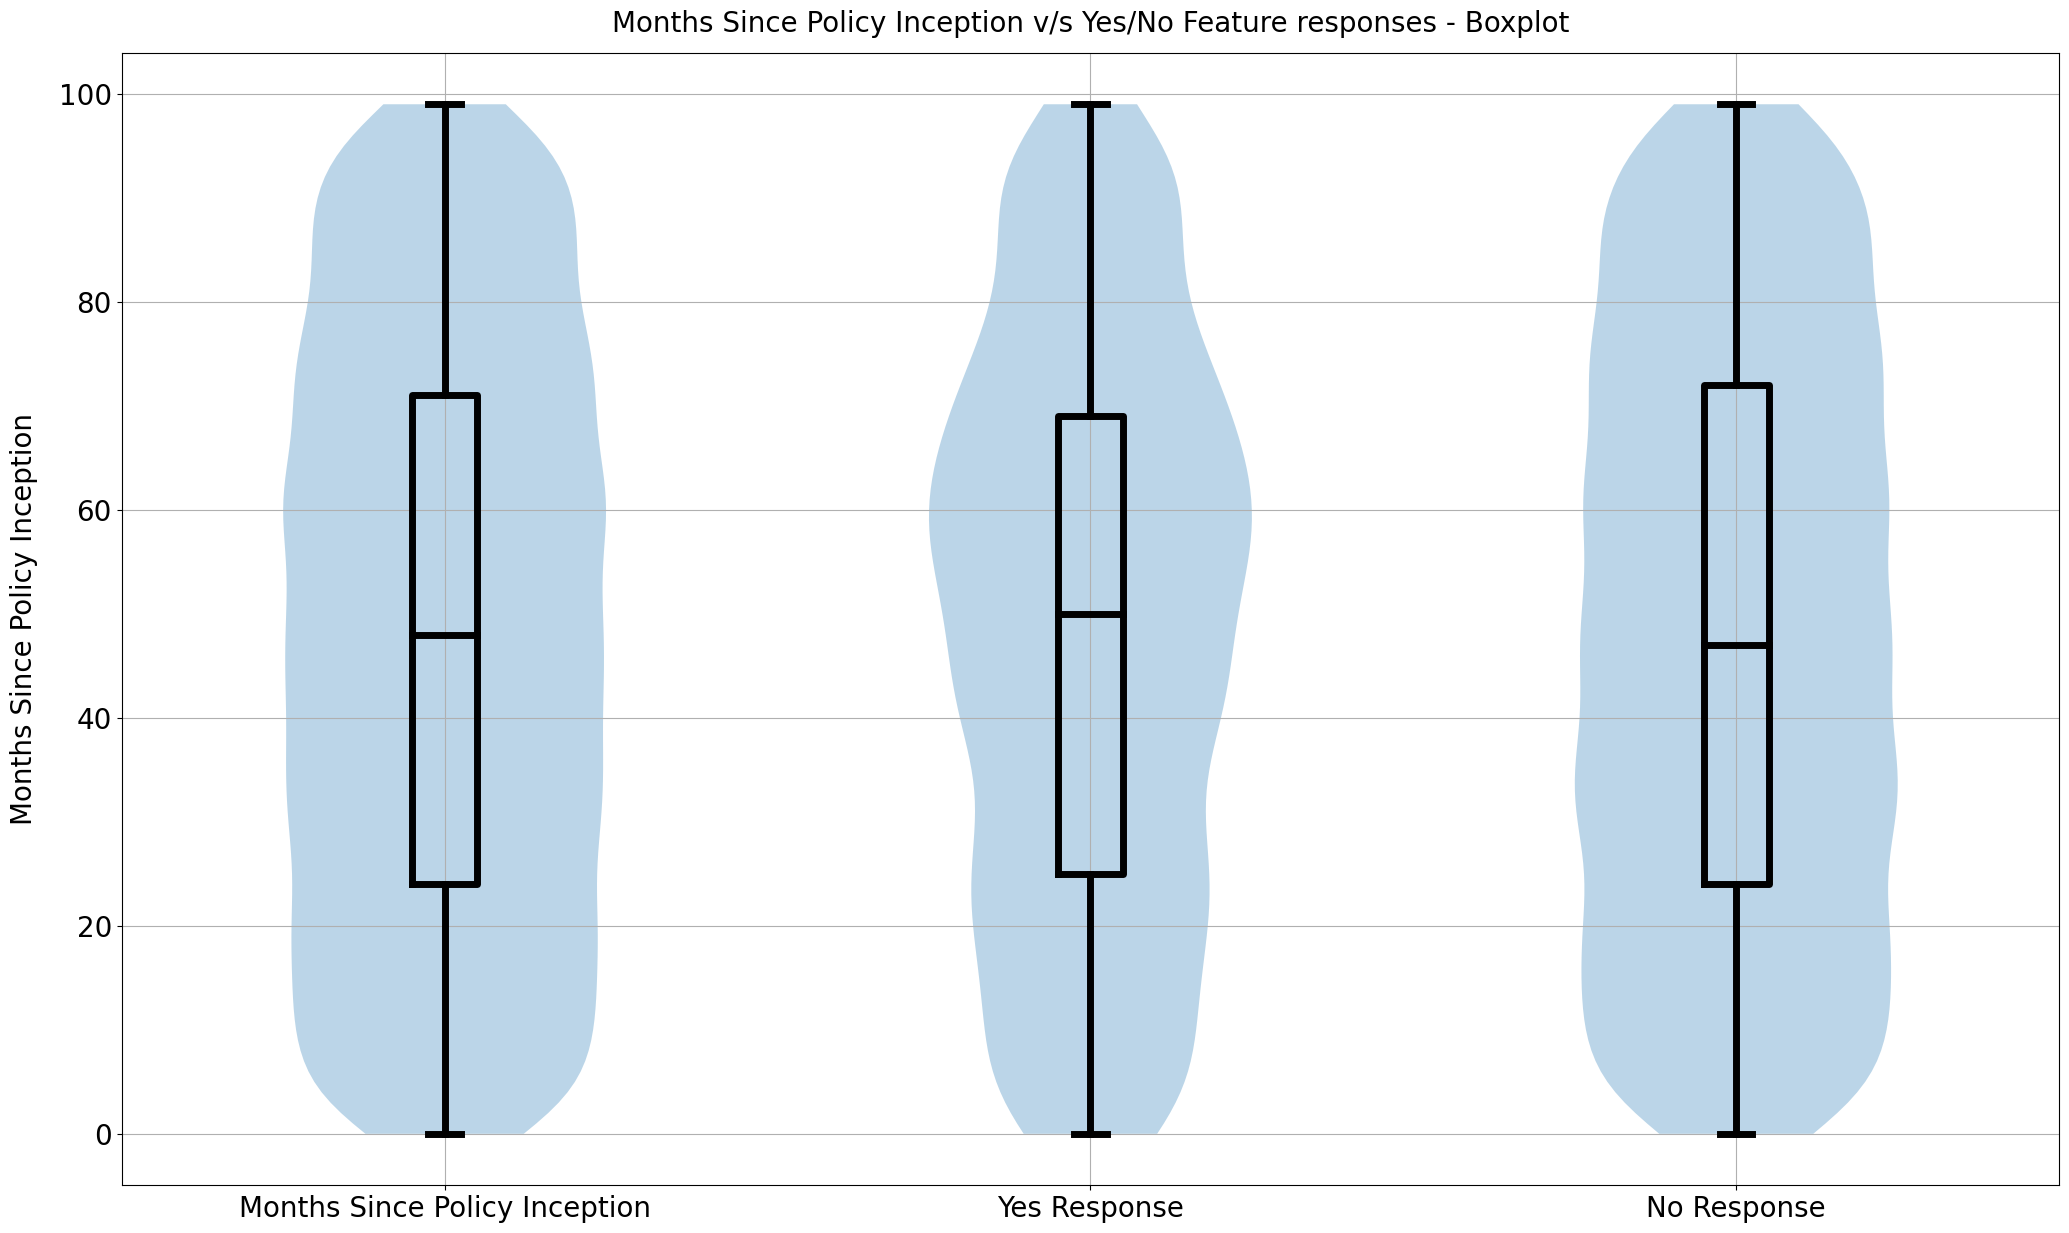

In [285]:
bp_plt('Months Since Policy Inception')

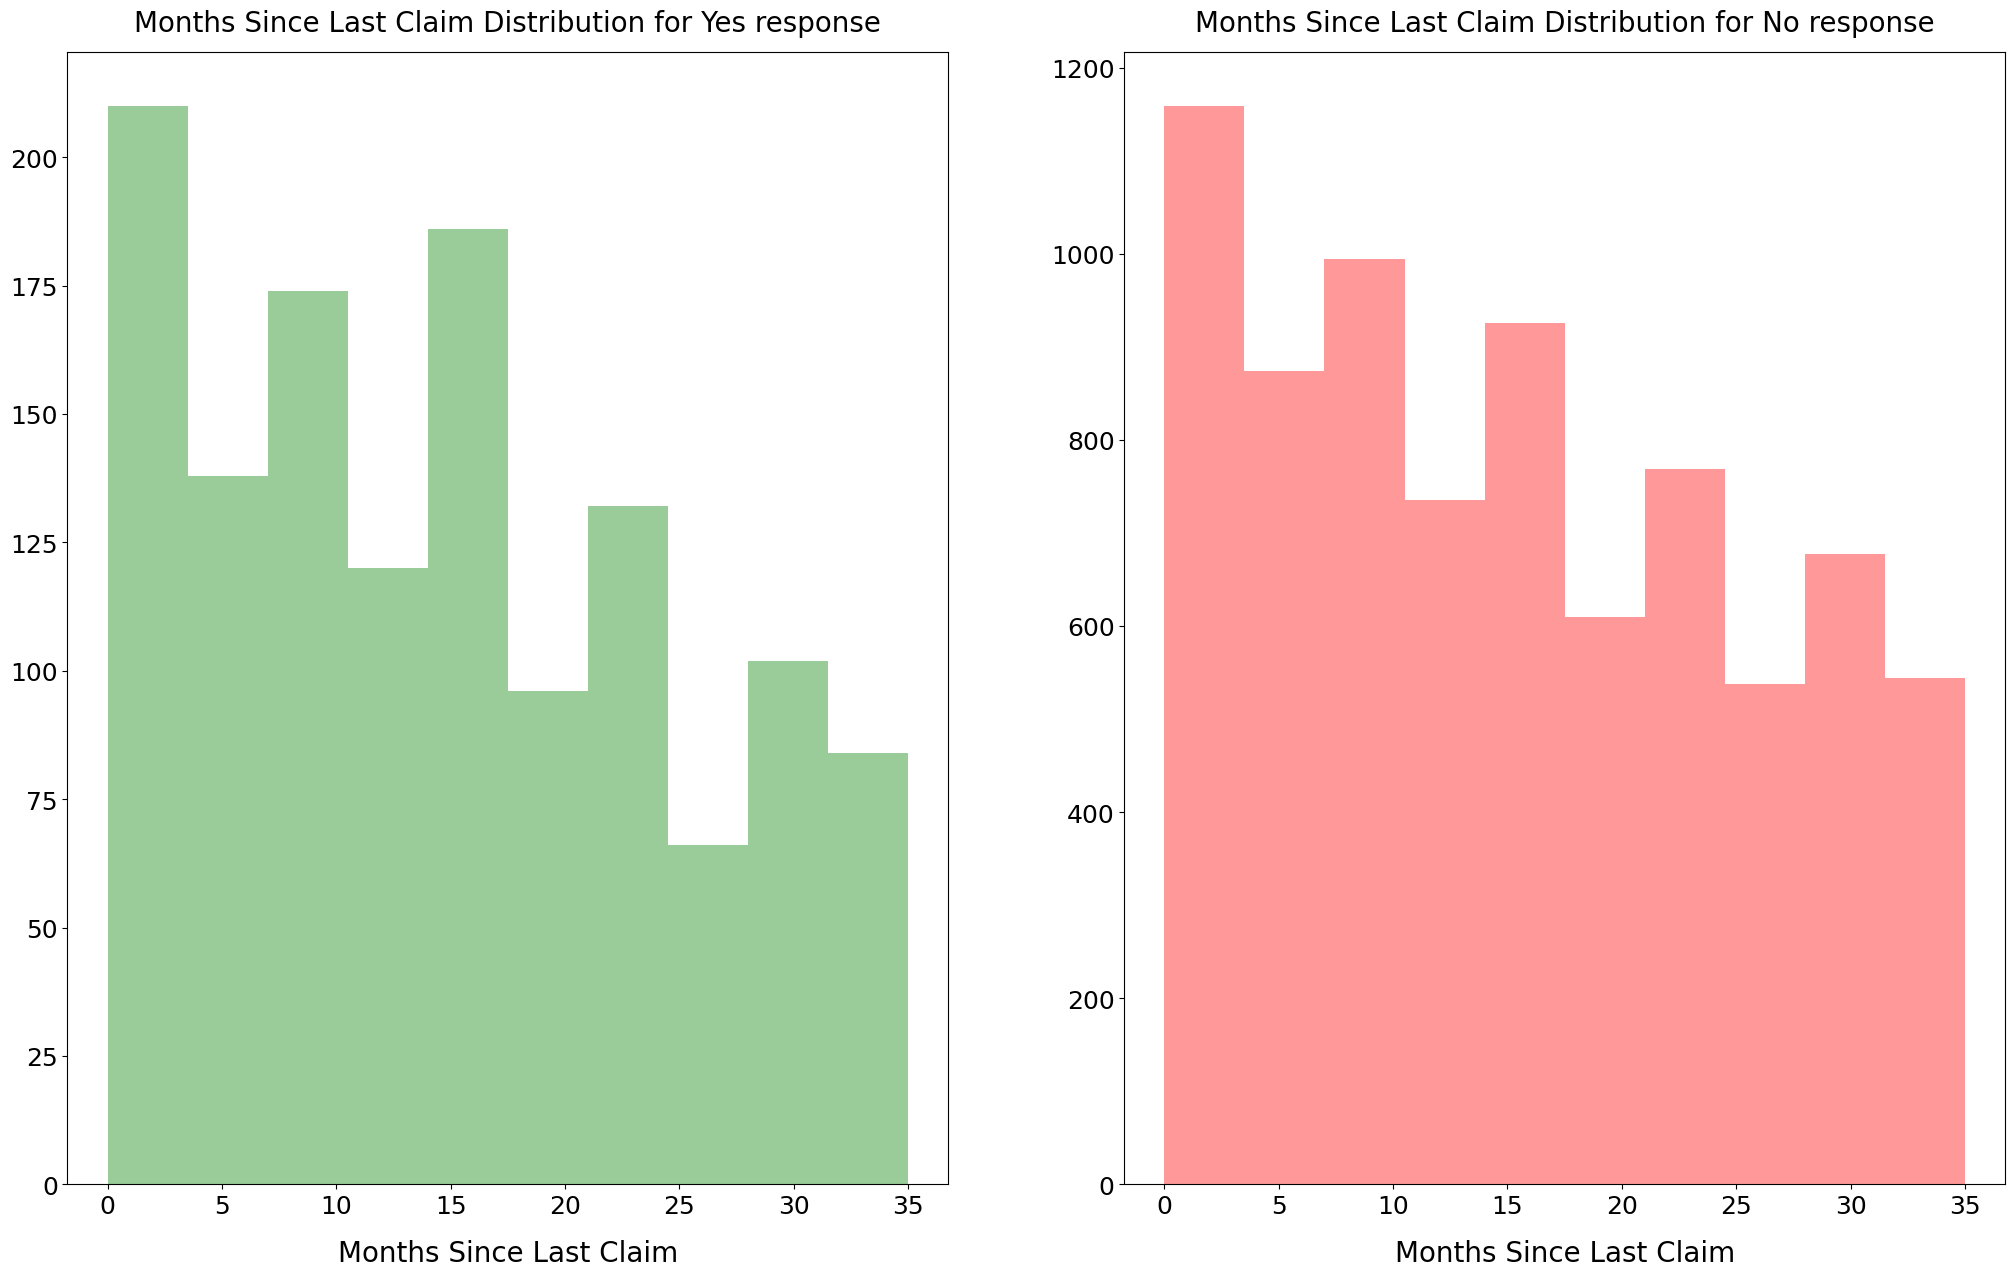

In [284]:
cont_hist('Months Since Last Claim', bins = 10)

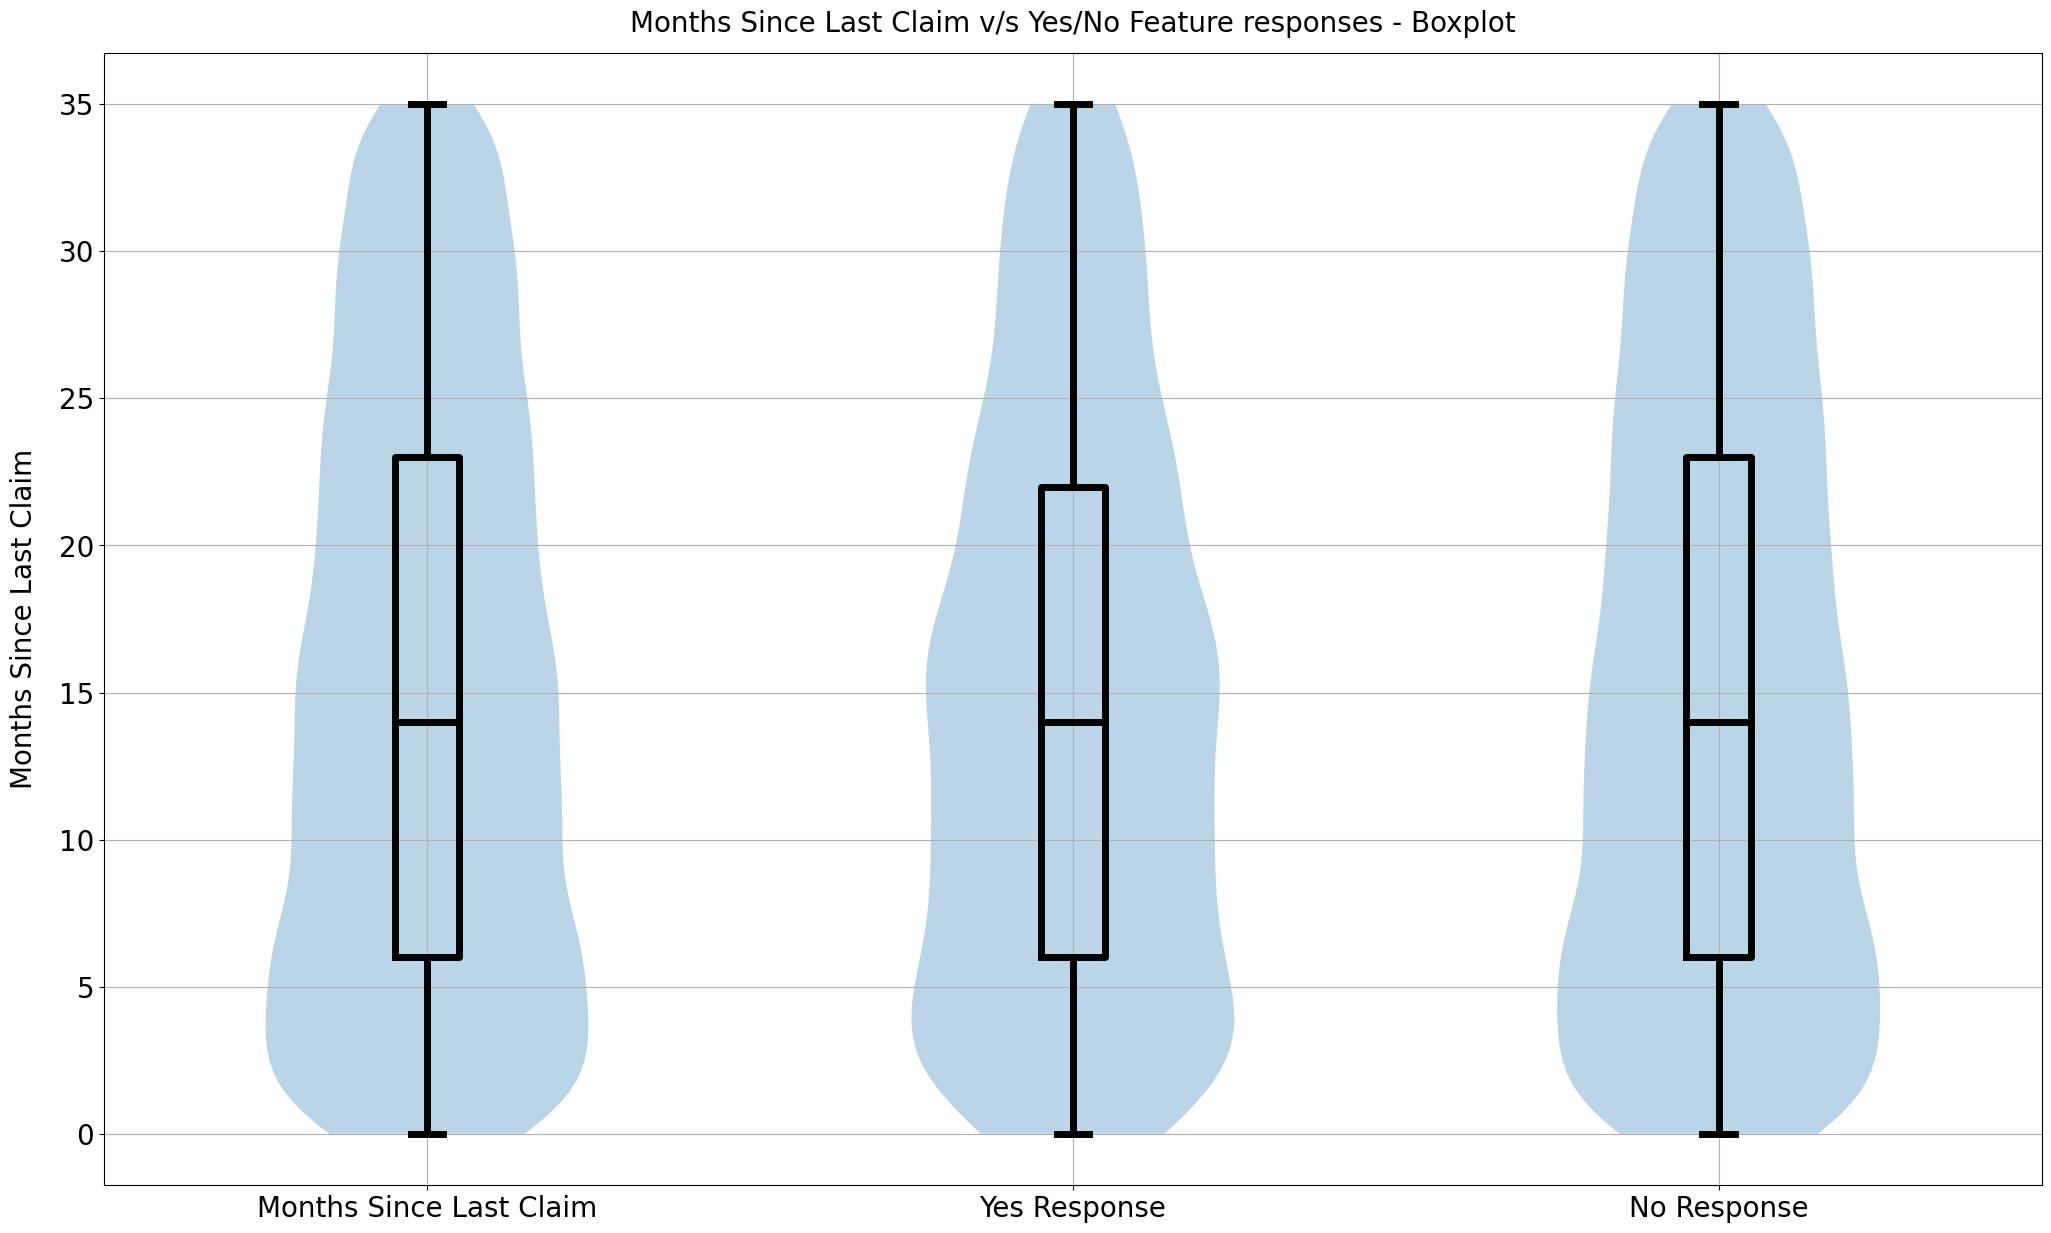

In [280]:
bp_plt('Months Since Last Claim')

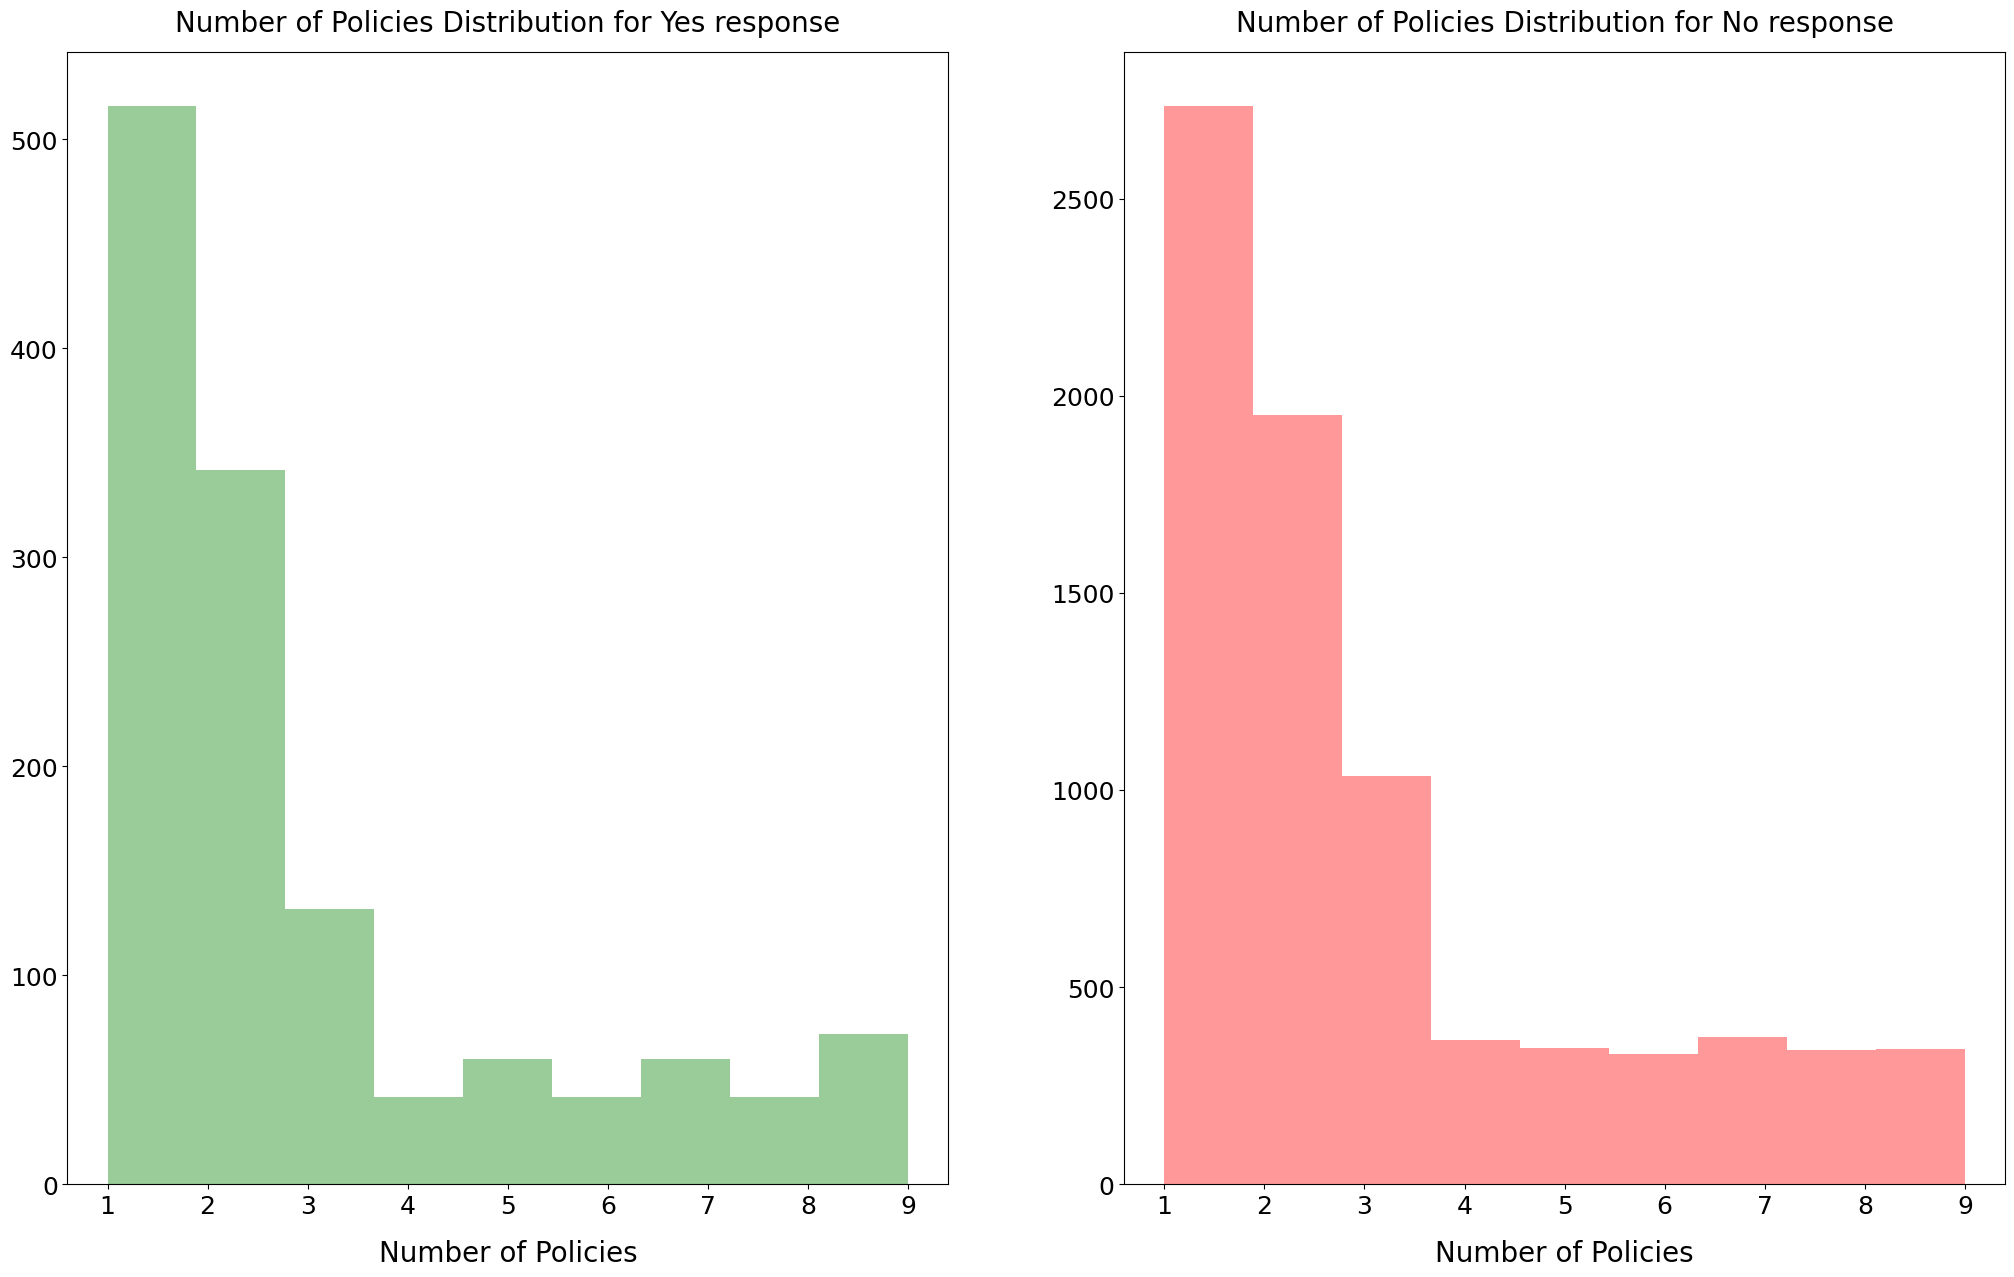

In [116]:
cont_hist('Number of Policies', bins = 9)

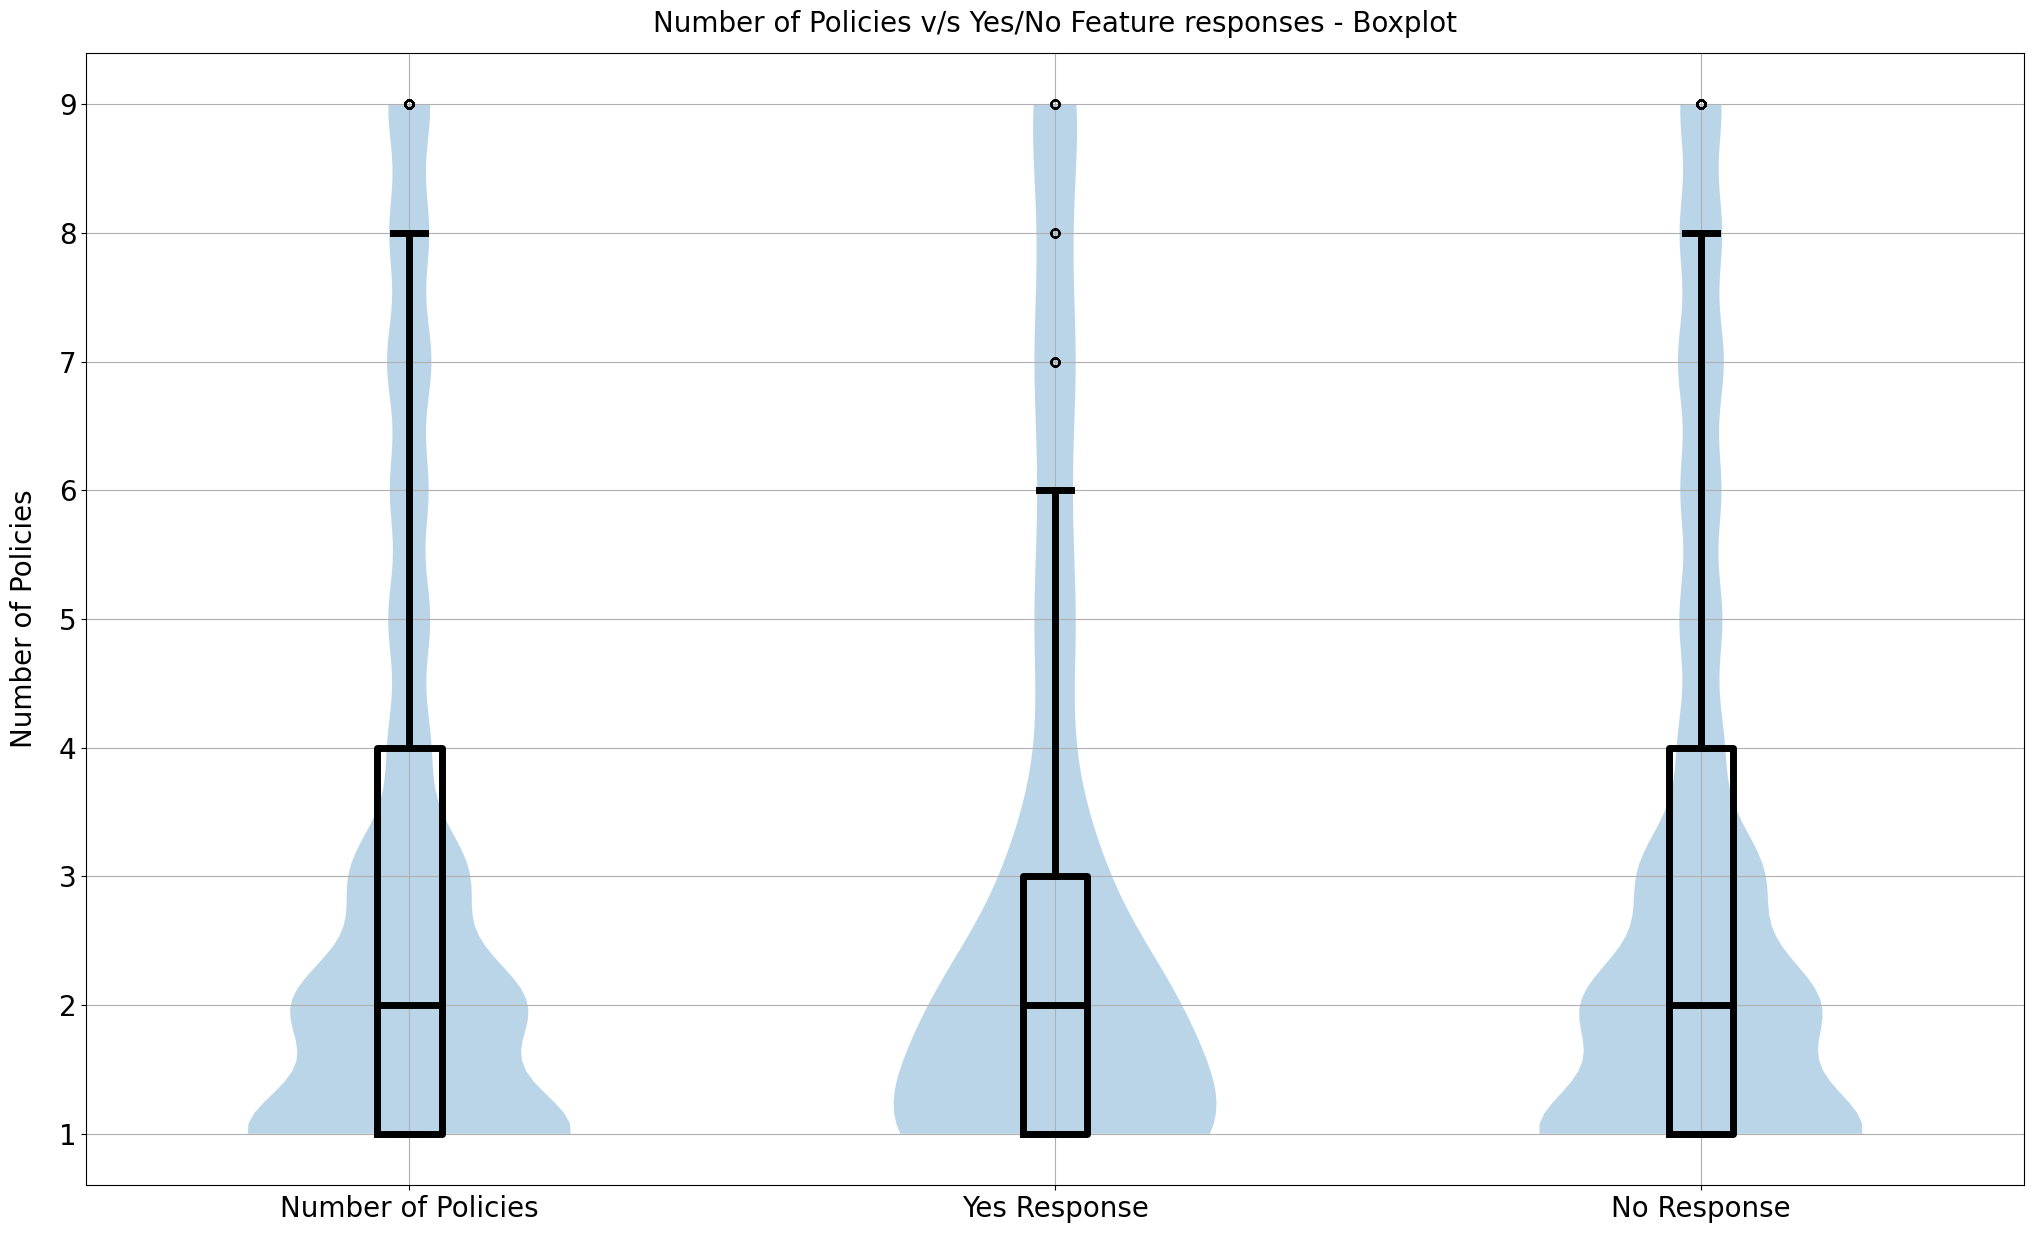

In [279]:
bp_plt('Number of Policies')

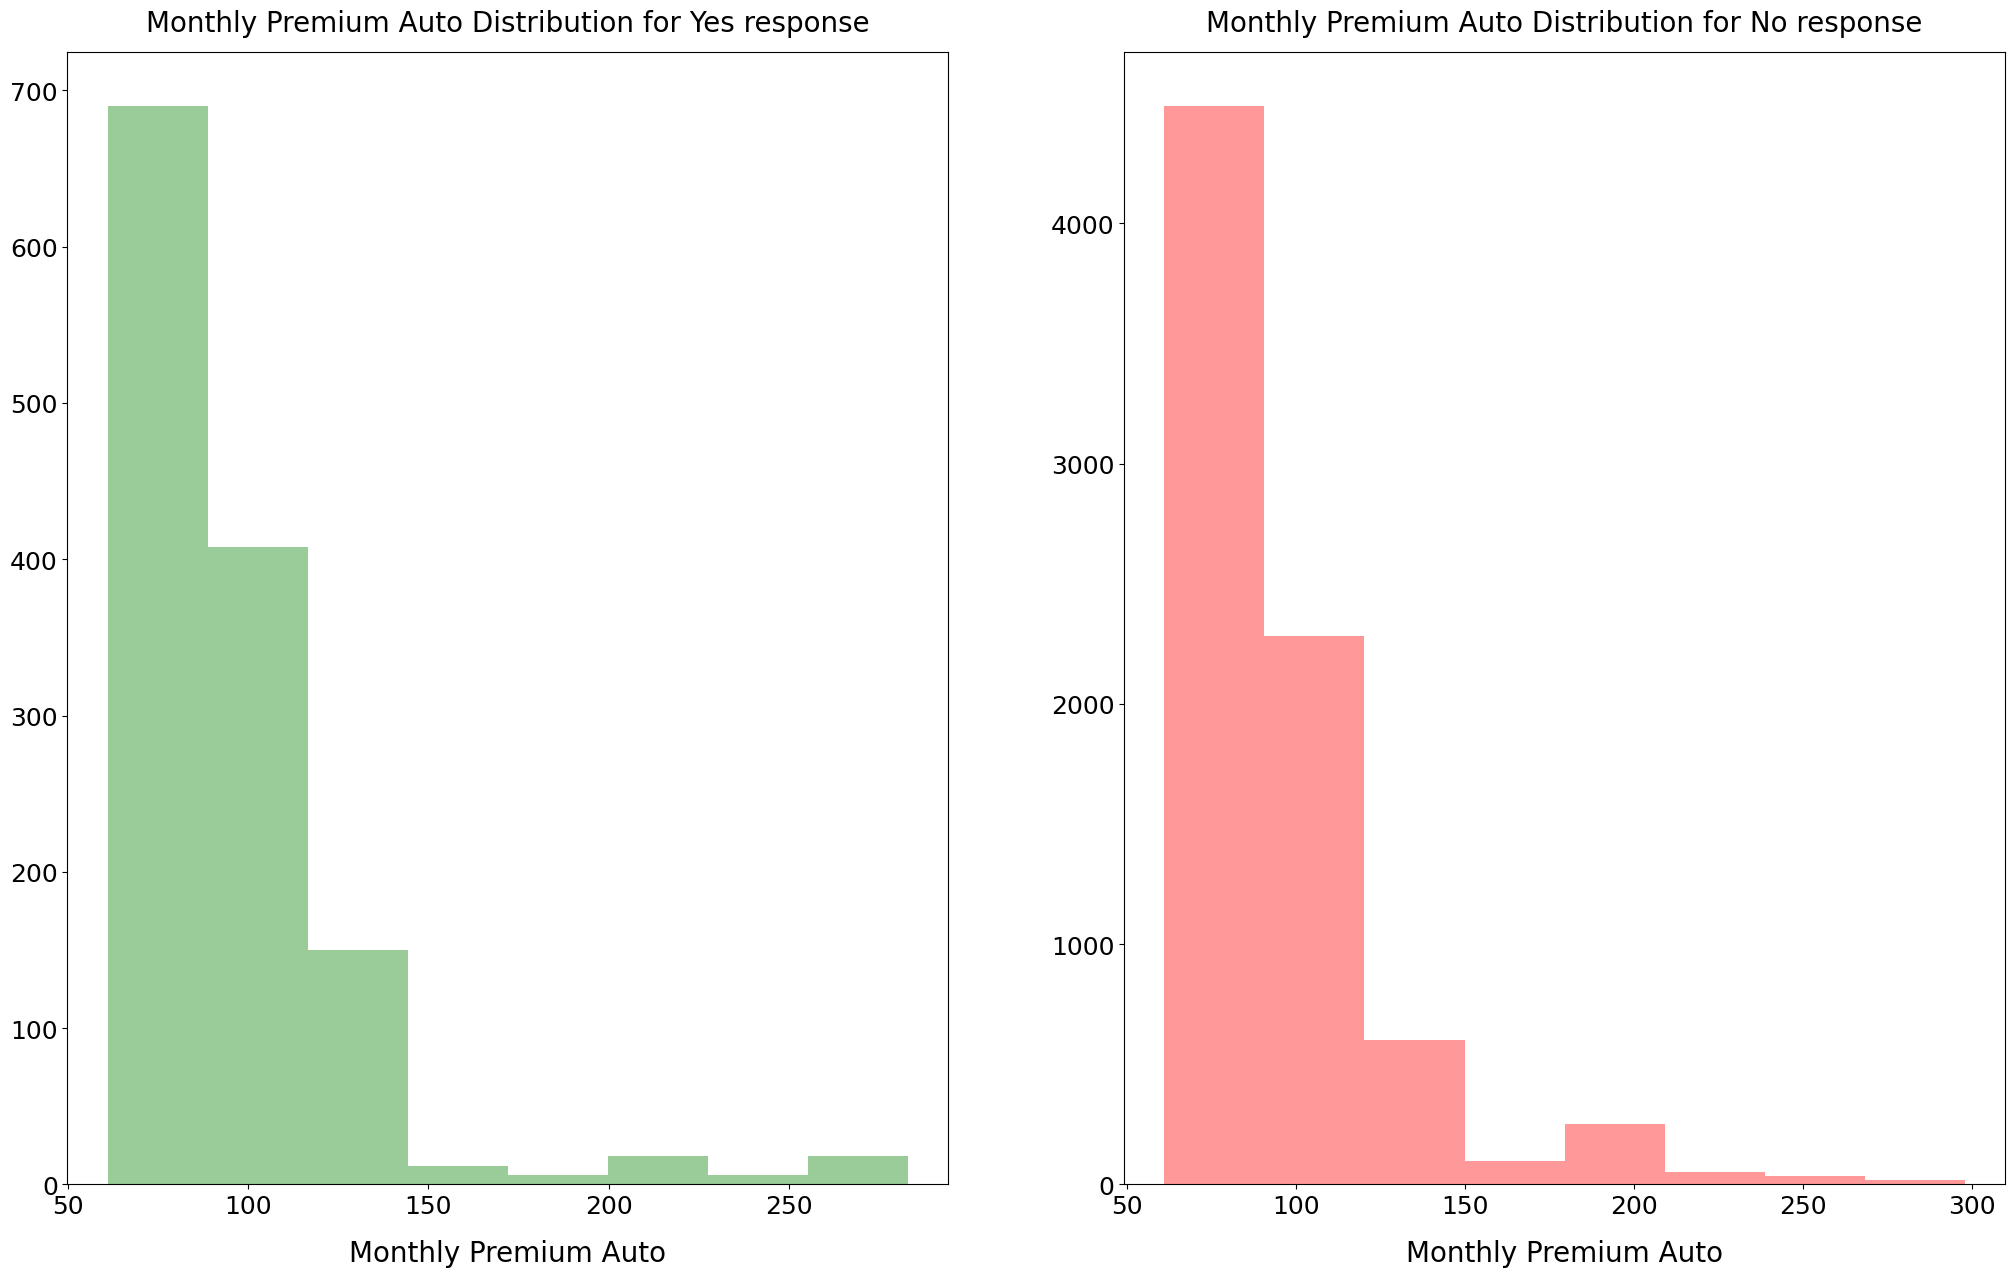

In [121]:
cont_hist('Monthly Premium Auto', bins = 8)

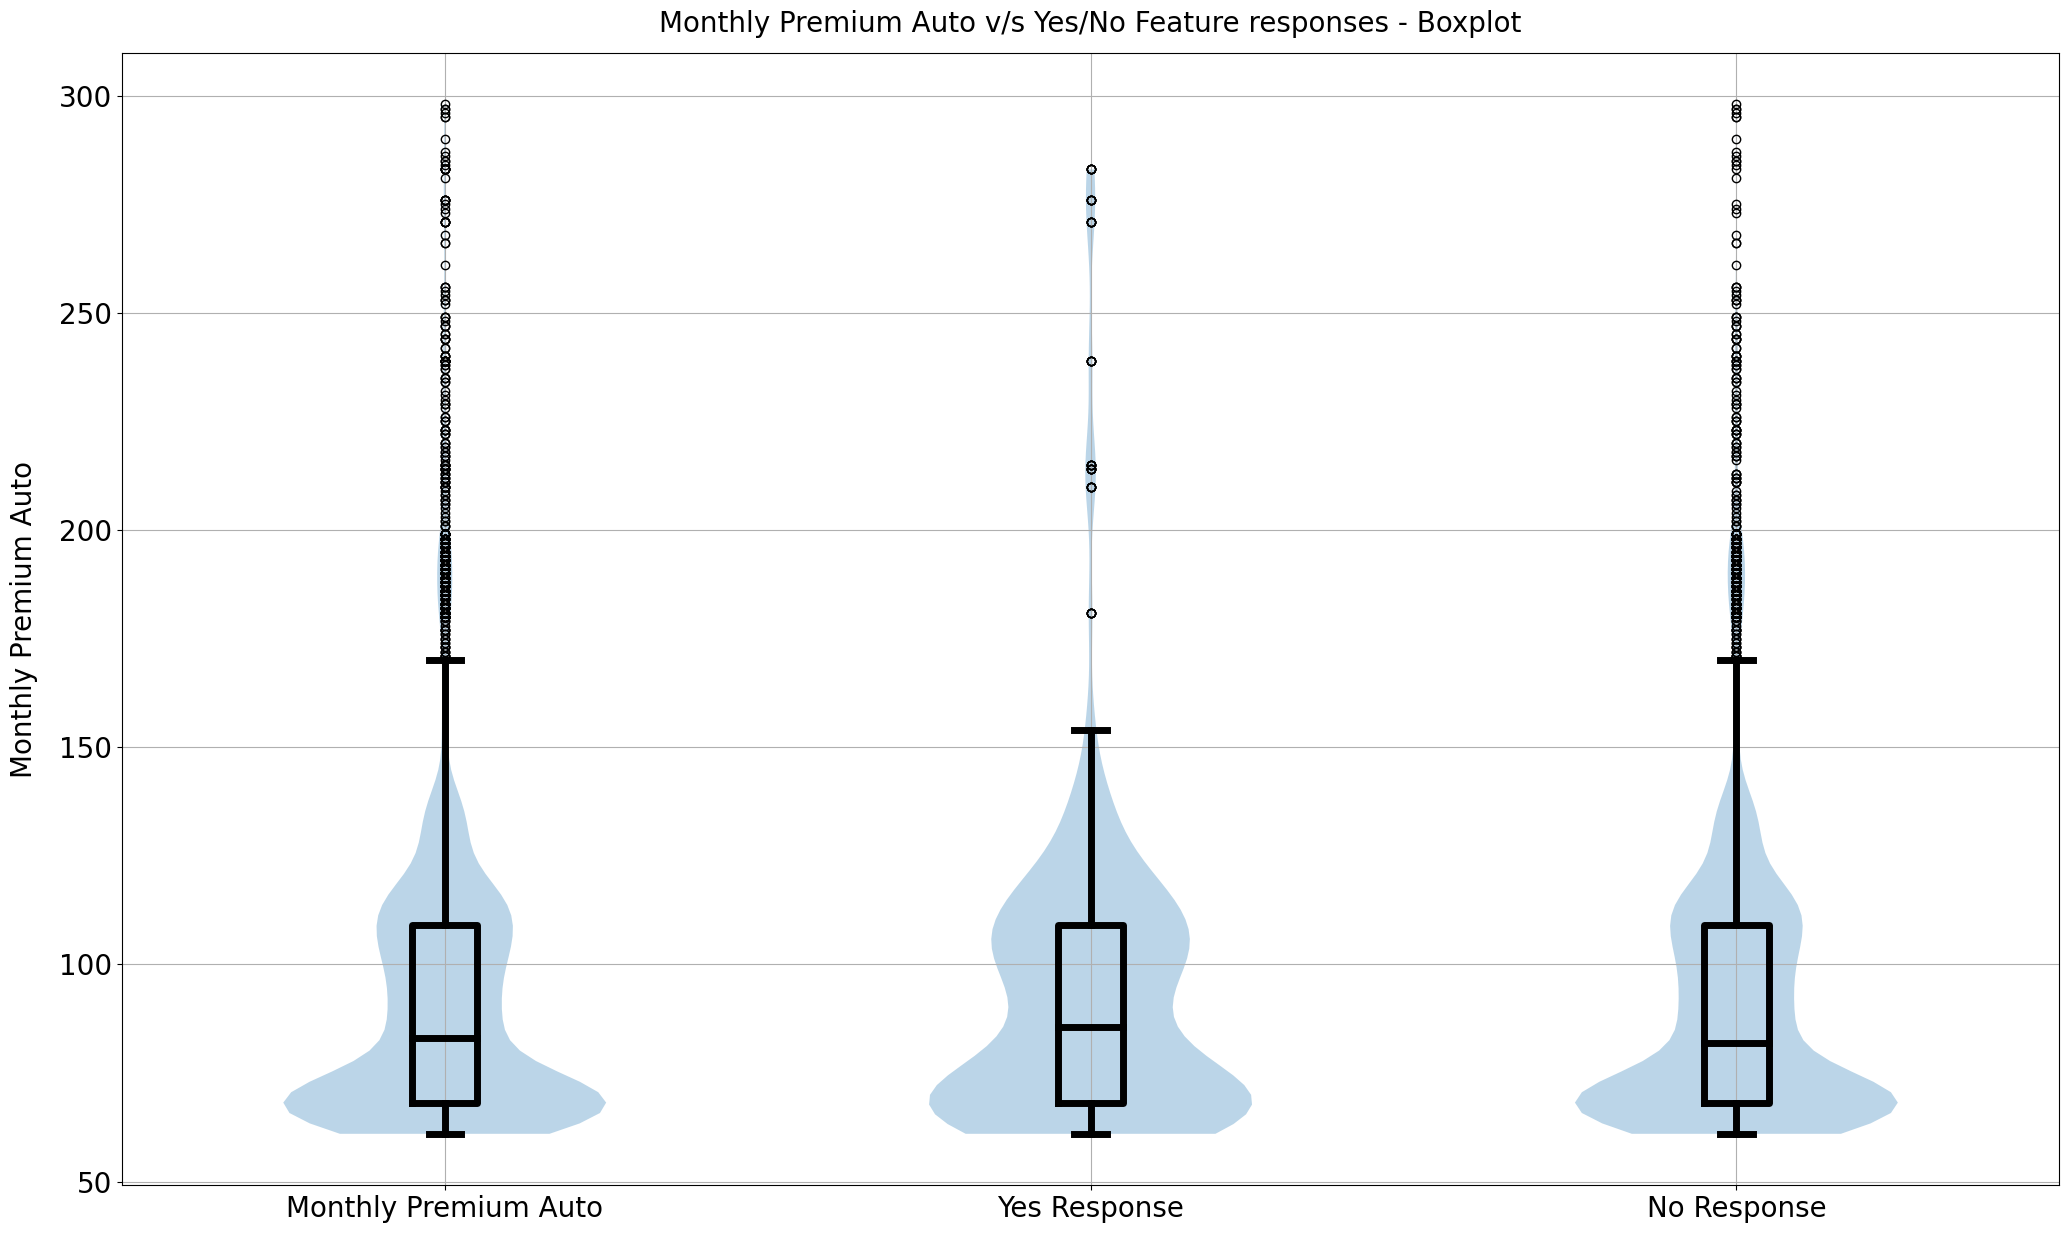

In [278]:
bp_plt('Monthly Premium Auto')

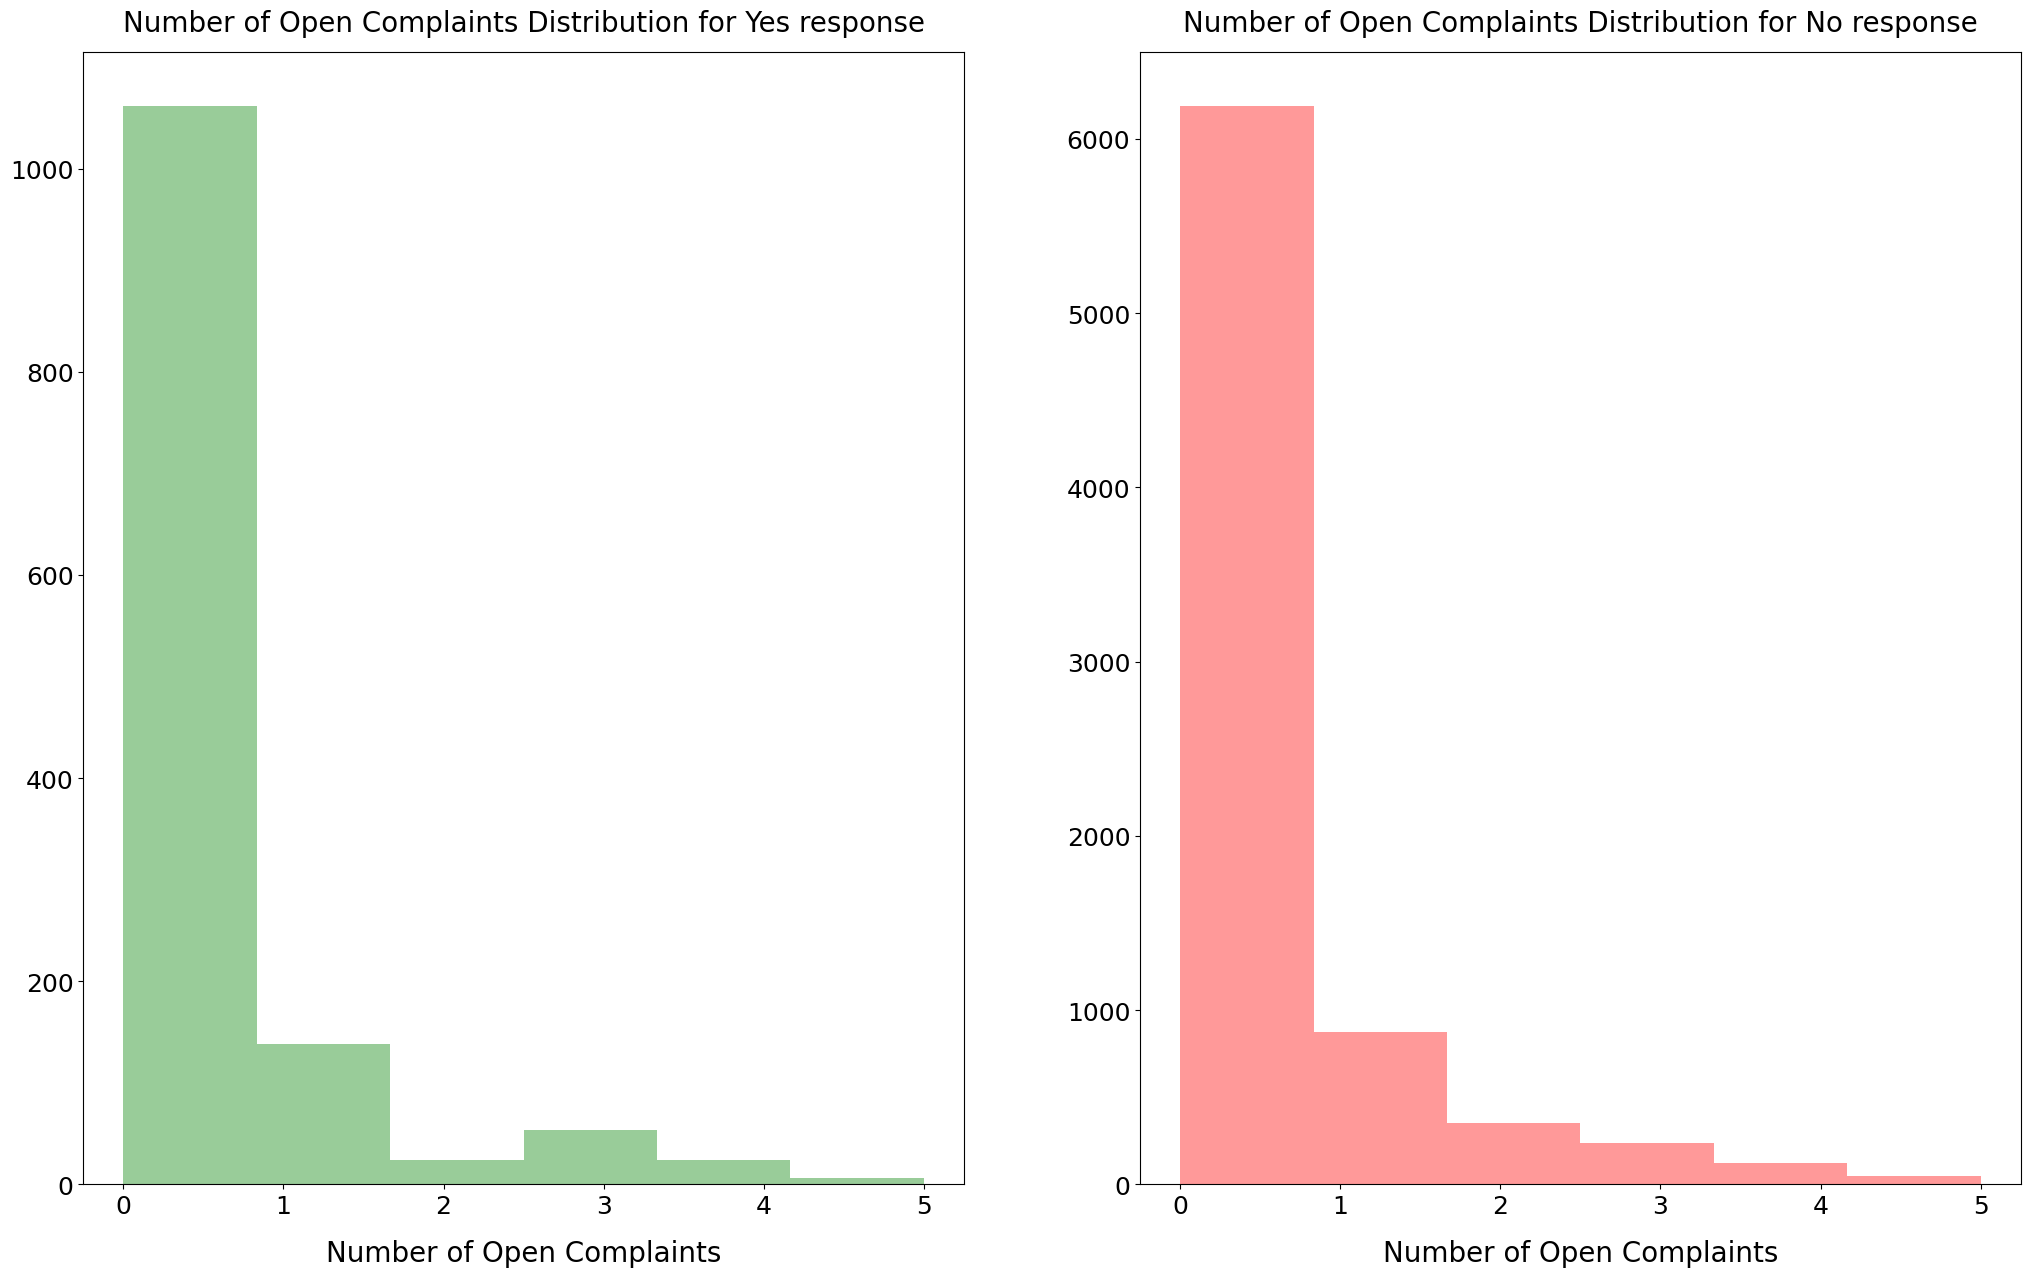

In [122]:
cont_hist('Number of Open Complaints', bins = 6)

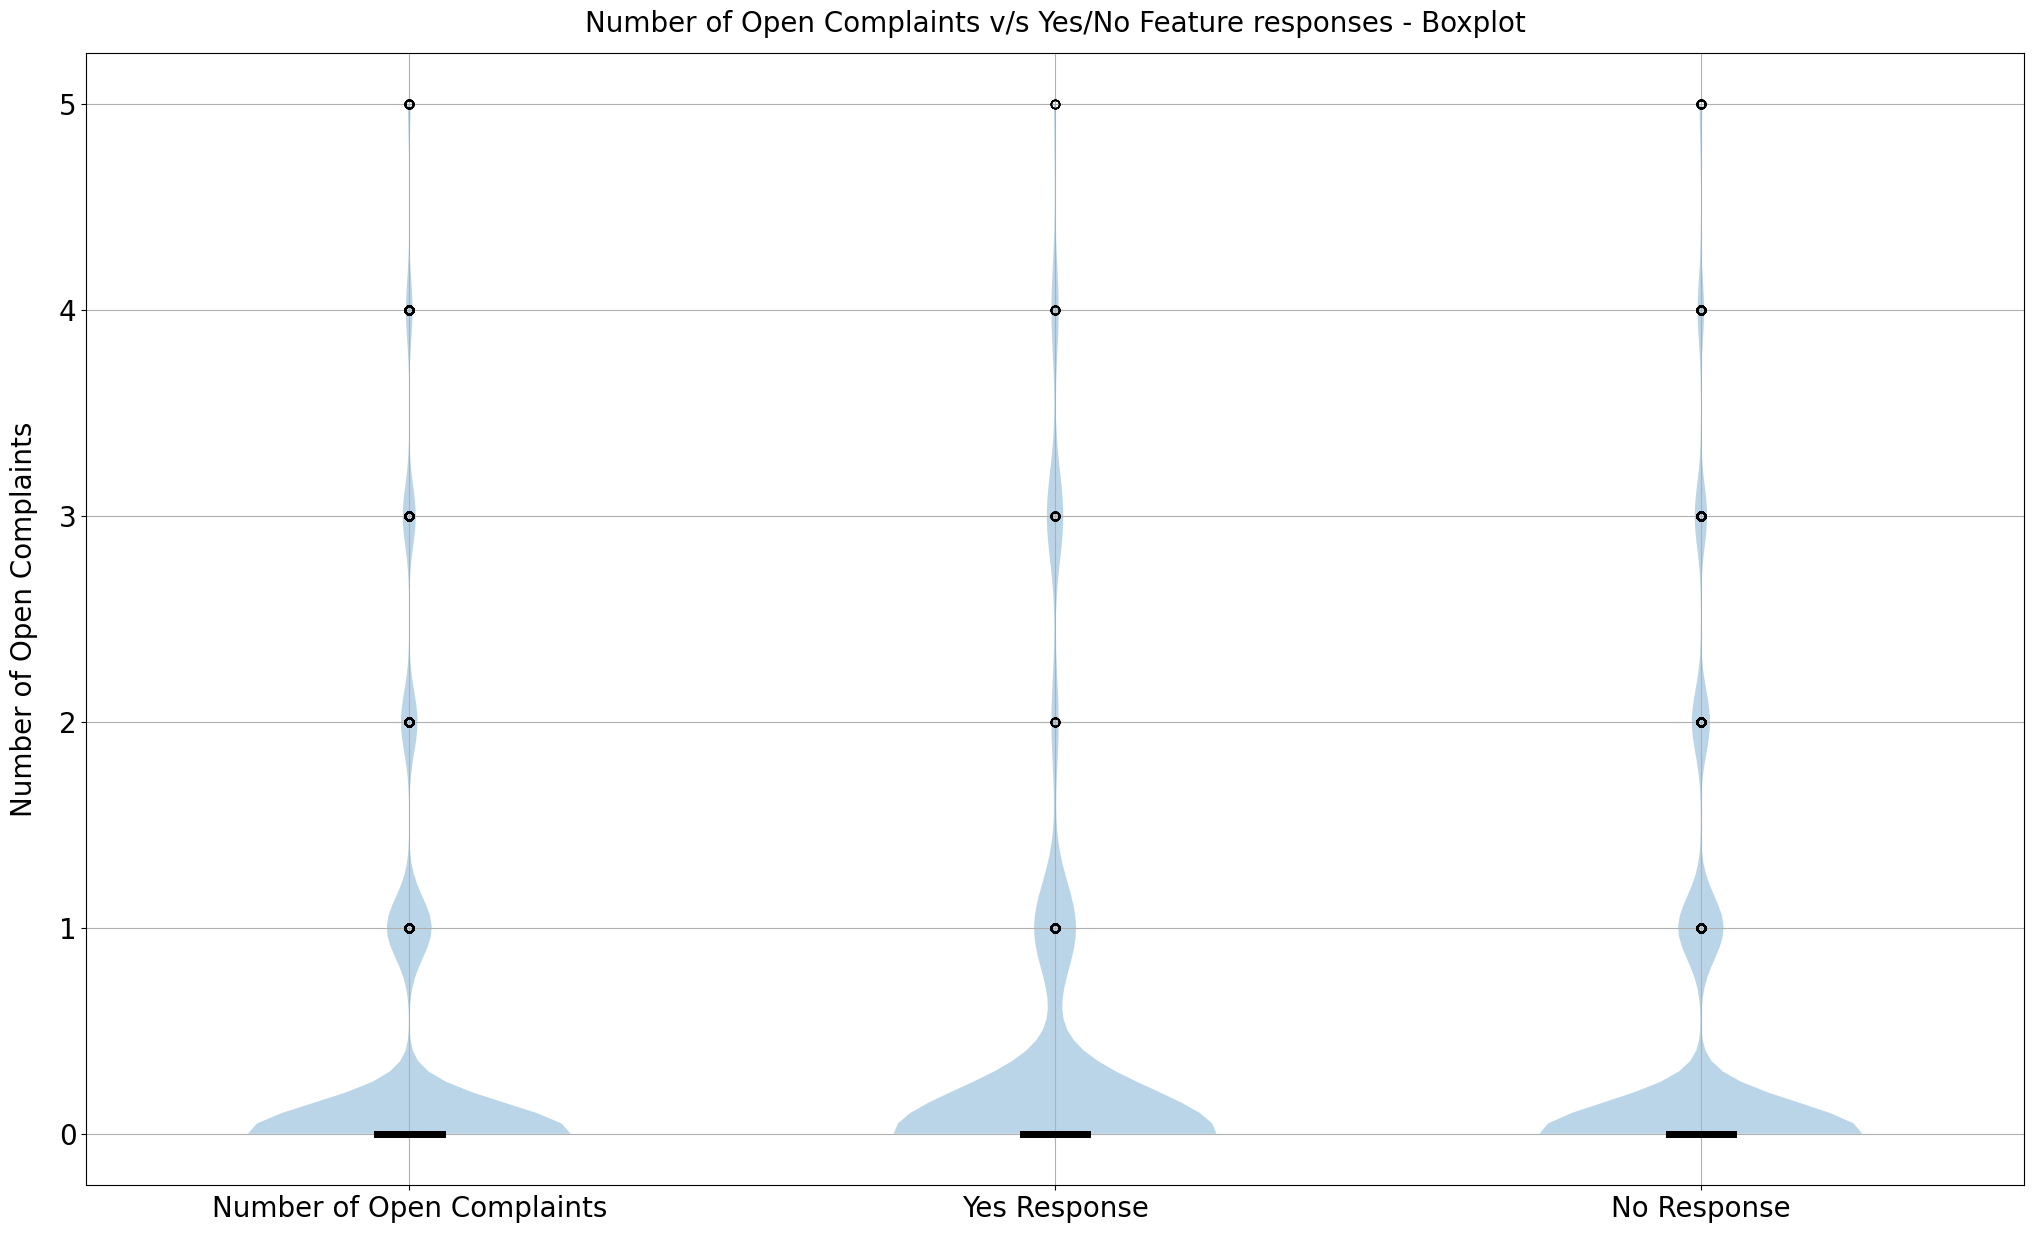

In [277]:
bp_plt('Number of Open Complaints')

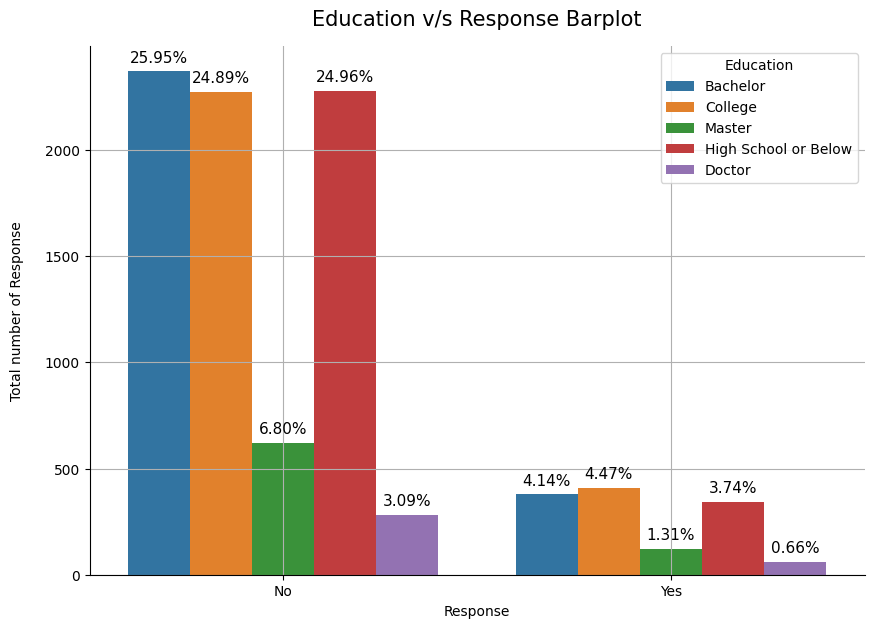

In [307]:
cat_plt('Education')

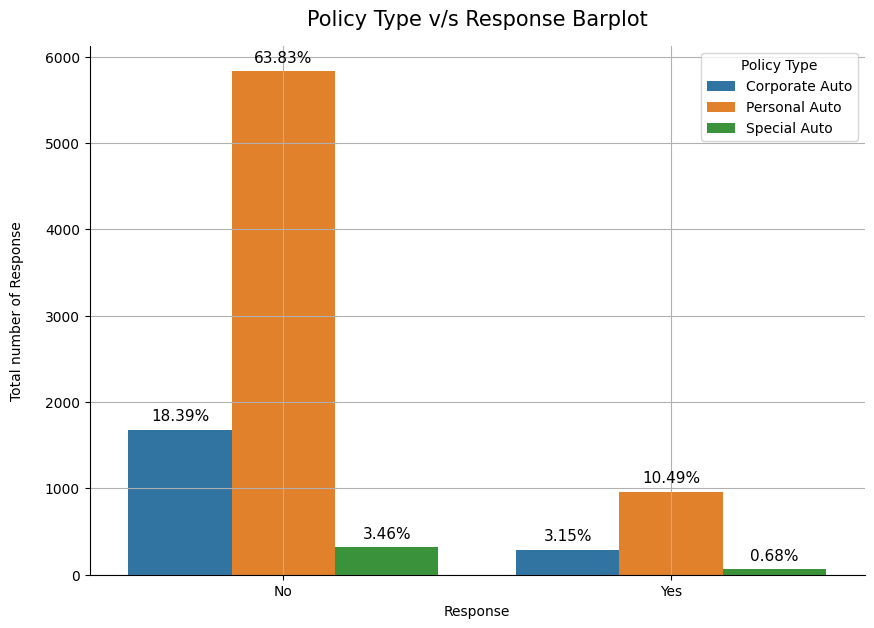

In [308]:
cat_plt('Policy Type')

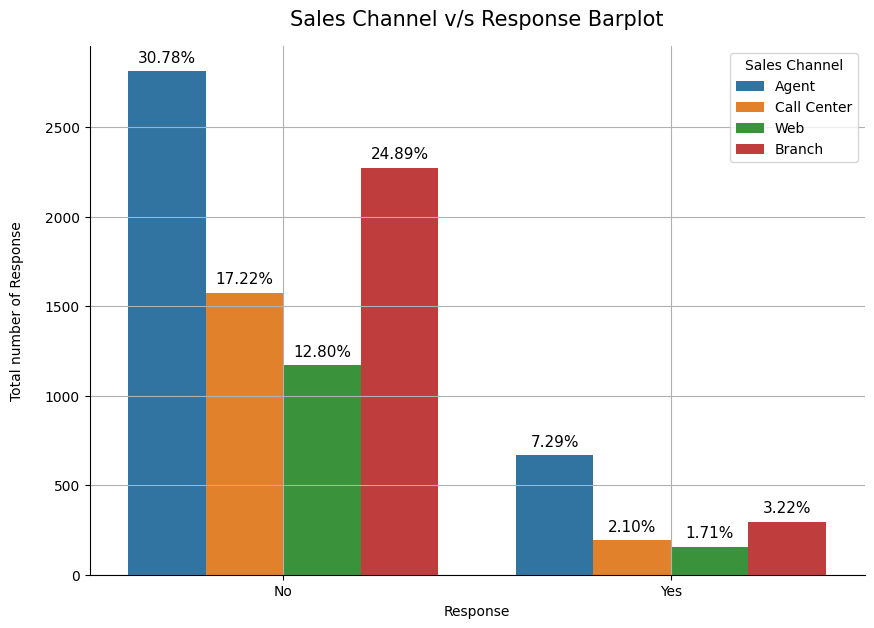

In [309]:
cat_plt('Sales Channel')

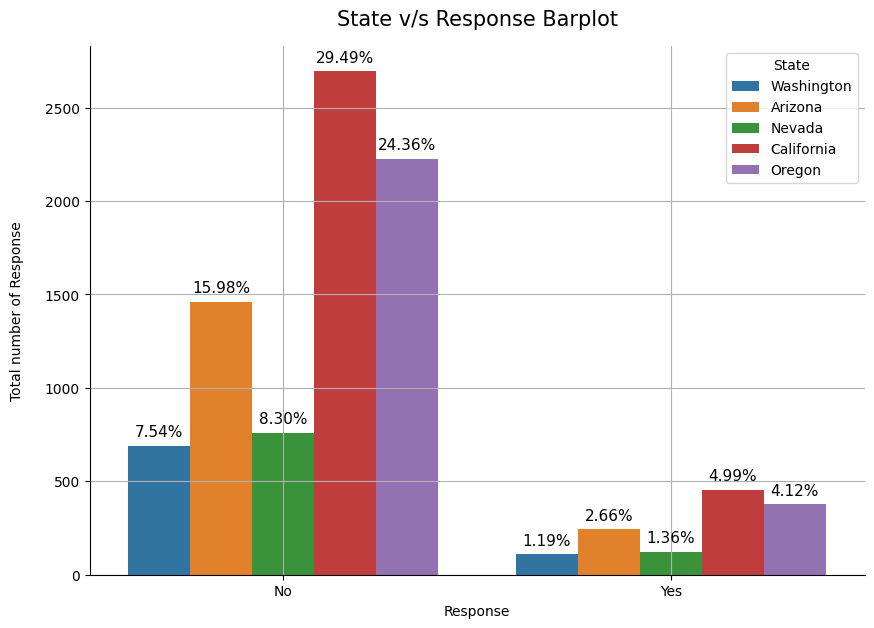

In [310]:
cat_plt('State')

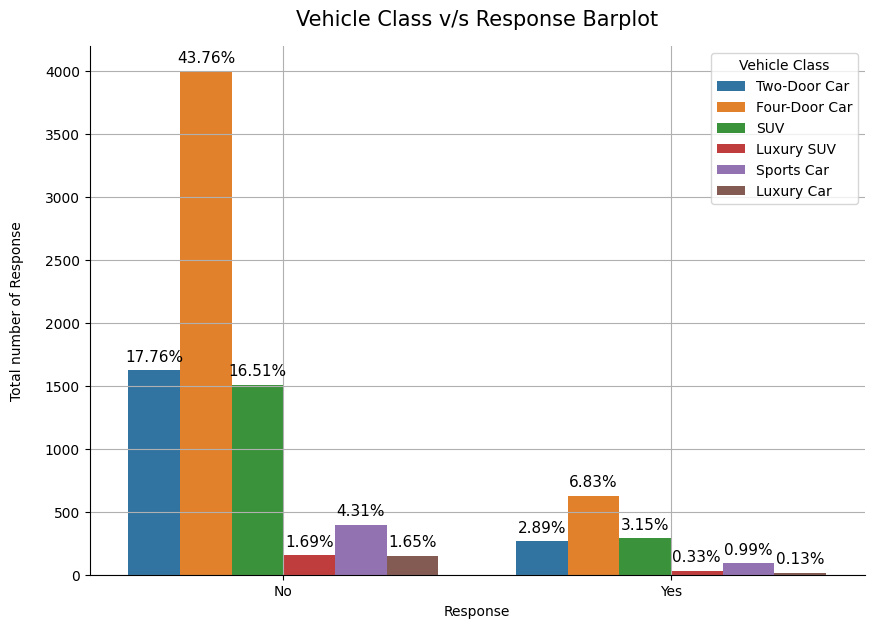

In [311]:
cat_plt('Vehicle Class')

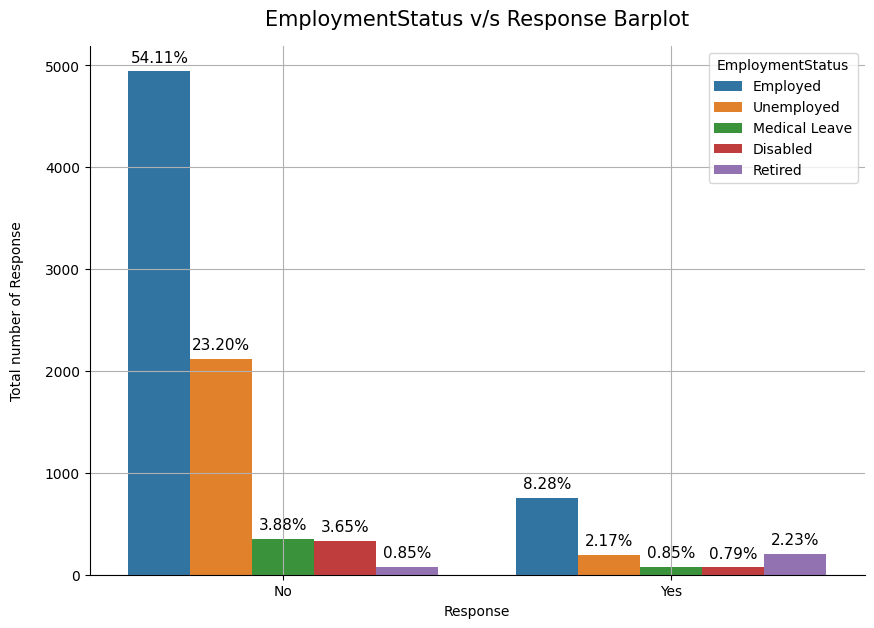

In [312]:
cat_plt('EmploymentStatus')

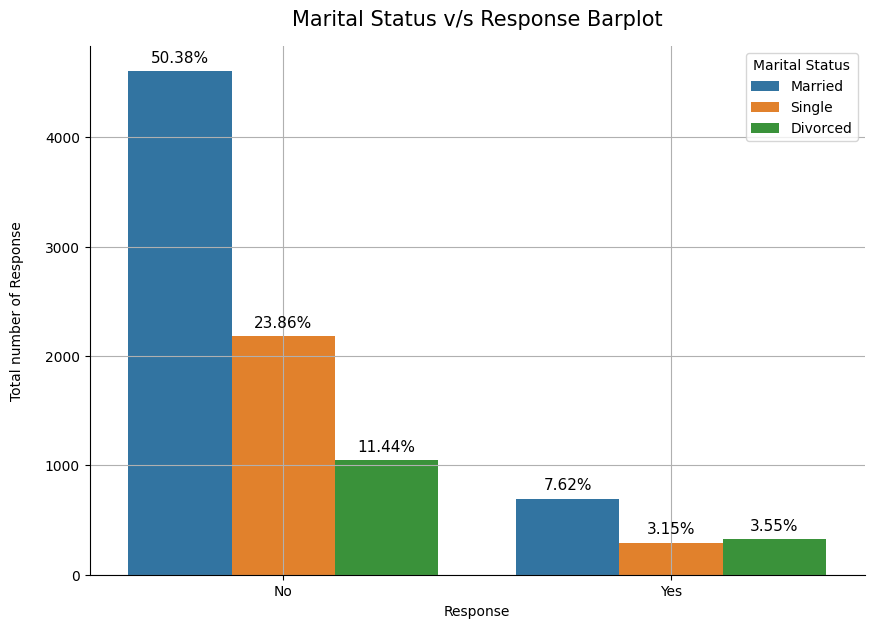

In [313]:
cat_plt('Marital Status')

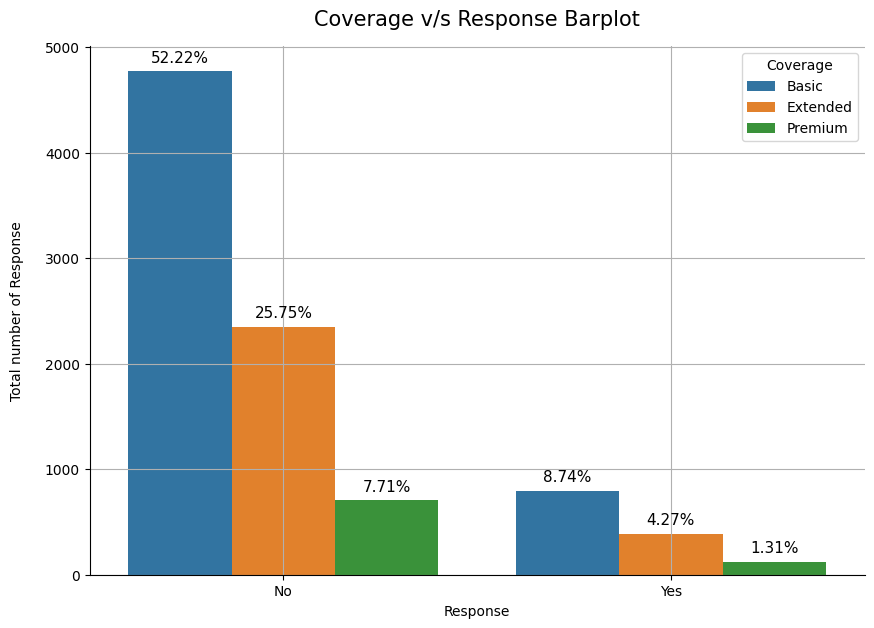

In [314]:
cat_plt('Coverage')

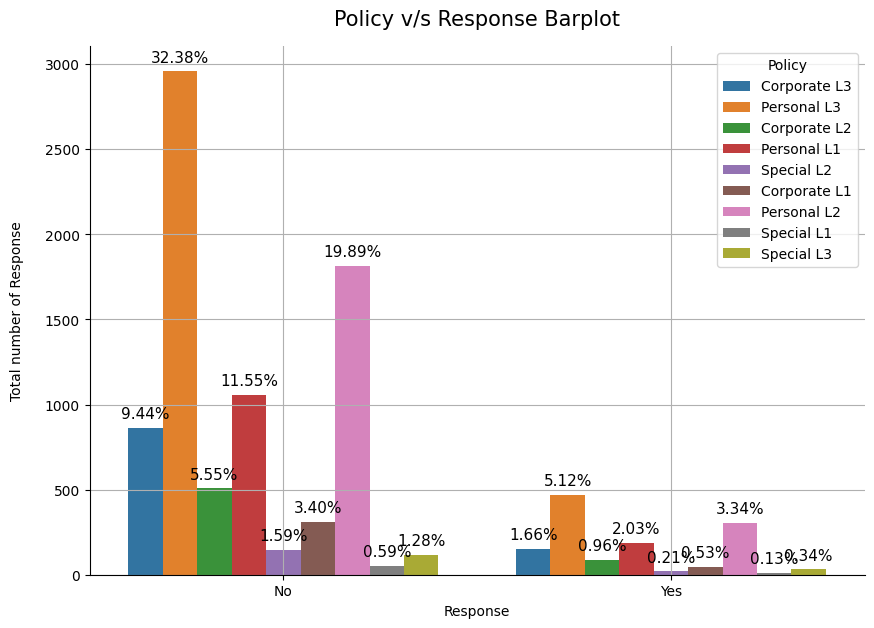

In [315]:
cat_plt('Policy')

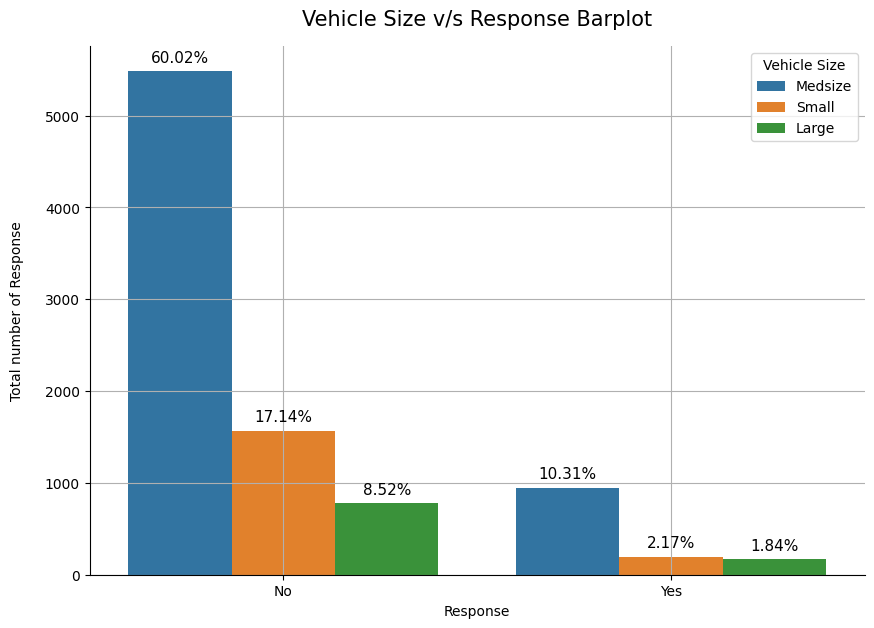

In [316]:
cat_plt('Vehicle Size')

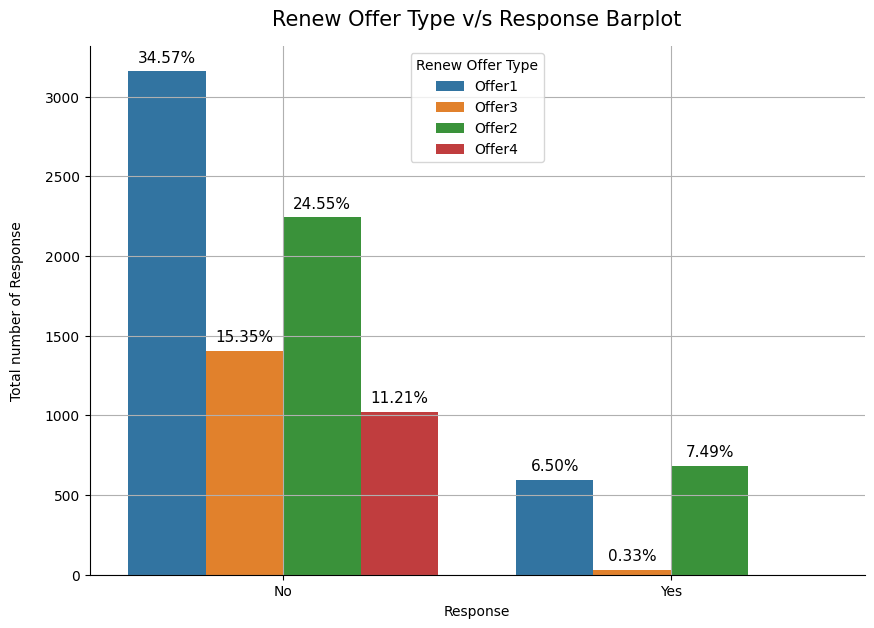

In [317]:
cat_plt('Renew Offer Type')

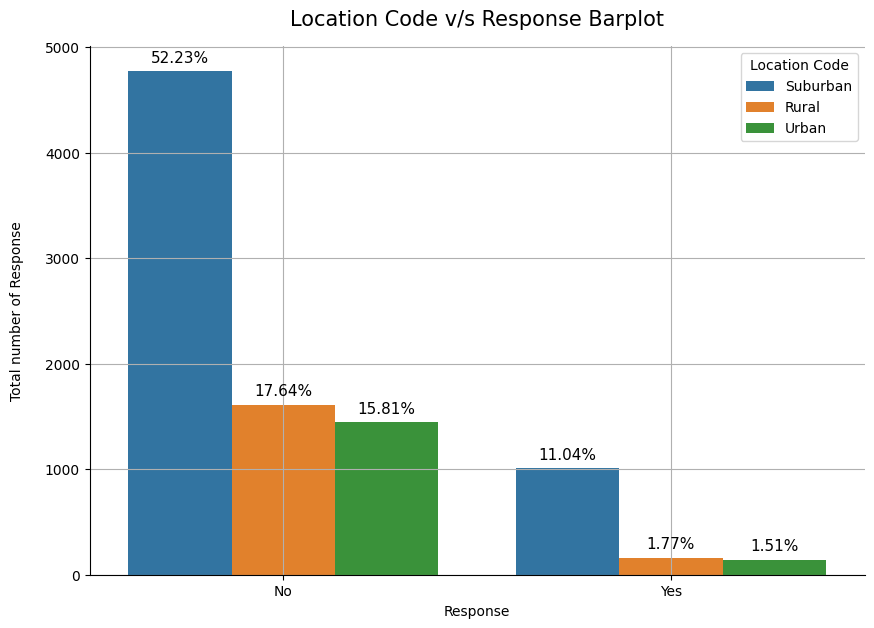

In [318]:
cat_plt('Location Code')

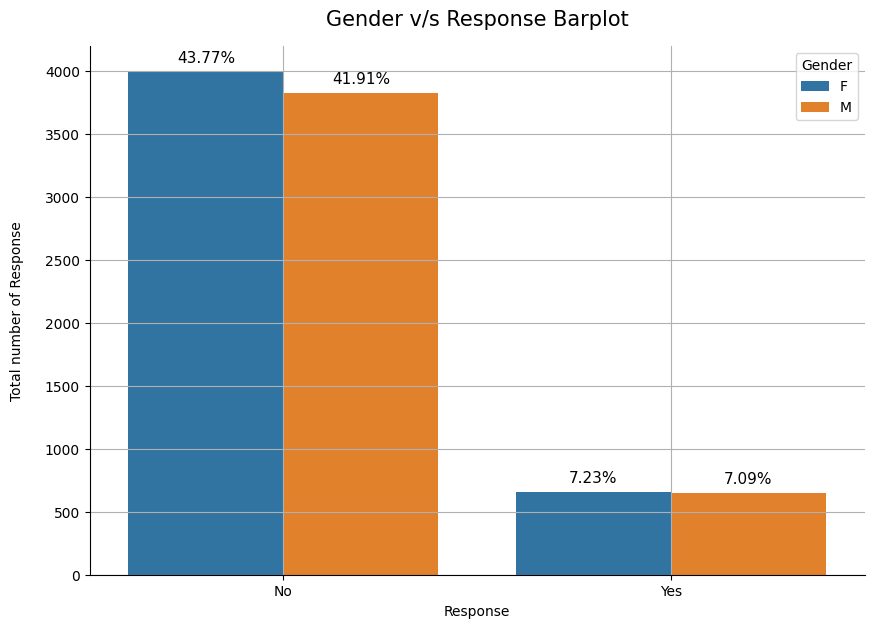

In [319]:
cat_plt('Gender')